In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
import statistics
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_type1 = pd.read_excel("Shanghai_T1DM_Summary.xlsx")
df_type2 = pd.read_excel("Shanghai_T2DM_Summary.xlsx")

In [3]:
df_type1.columns

Index(['Patient Number', 'Gender (Female=1, Male=2)', 'Age (years)',
       'Height (m)', 'Weight (kg)', 'BMI (kg/m2)',
       'Smoking History (pack year)',
       'Alcohol Drinking History (drinker/non-drinker)', 'Type of Diabetes',
       'Duration of Diabetes (years)', 'Acute Diabetic Complications',
       'Diabetic Macrovascular  Complications',
       'Diabetic Microvascular Complications', 'Comorbidities',
       'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose (mg/dl)',
       '2-hour Postprandial Plasma Glucose (mg/dl)',
       'Fasting C-peptide (nmol/L)', '2-hour Postprandial C-peptide (nmol/L)',
       'Fasting Insulin (pmol/L)', '2-hour Postprandial Insulin (pmol/L)',
       'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
       'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
       'High-Density Lipoprotein Cholesterol (mmol/L)',
       'Low-Density Lipoprotein Cholesterol (mmol/L)', 'Creatinine (umol/L)',
       'Estimated Glomerular Filtration Rate  (m

In [4]:
df_type2.columns

Index(['Patient Number', 'Gender (Female=1, Male=2)', 'Age (years)',
       'Height (m)', 'Weight (kg)', 'BMI (kg/m2)',
       'Smoking History (pack year)',
       'Alcohol Drinking History (drinker/non-drinker)', 'Type of Diabetes',
       'Duration of Diabetes (years)', 'Acute Diabetic Complications',
       'Diabetic Macrovascular  Complications',
       'Diabetic Microvascular Complications', 'Comorbidities',
       'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose (mg/dl)',
       '2-hour Postprandial Plasma Glucose (mg/dl)',
       'Fasting C-peptide (nmol/L)', '2-hour Postprandial C-peptide (nmol/L)',
       'Fasting Insulin (pmol/L)', '2-hour Postprandial insulin (pmol/L)',
       'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
       'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
       'High-Density Lipoprotein Cholesterol (mmol/L)',
       'Low-Density Lipoprotein Cholesterol (mmol/L)', 'Creatinine (umol/L)',
       'Estimated Glomerular Filtration Rate  (m

#### Combining both datasets

In [5]:
# Rename columns for consistency
df_type1.columns = ['Patient Number', 'Gender', 'Age', 'Height', 'Weight', 'BMI', 'Smoking History', 'Alcohol Drinking History', 'Type of Diabetes', 'Duration of Diabetes', 'Acute Diabetic Complications', 'Diabetic Macrovascular Complications', 'Diabetic Microvascular Complications', 'Comorbidities', 'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose', '2-hour Postprandial Plasma Glucose', 'Fasting C-peptide', '2-hour Postprandial C-peptide', 'Fasting Insulin', '2-hour Postprandial Insulin', 'HbA1c', 'Glycated Albumin', 'Total Cholesterol', 'Triglyceride', 'High-Density Lipoprotein Cholesterol', 'Low-Density Lipoprotein Cholesterol', 'Creatinine', 'Estimated Glomerular Filtration Rate', 'Uric Acid', 'Blood Urea Nitrogen', 'Hypoglycemia']

df_type2.columns = df_type1.columns  # Assume they have the same columns

# Concatenate the DataFrames vertically
df = pd.concat([df_type1, df_type2], ignore_index=True)

# Print the first few rows of the combined DataFrame
df.head()

Patient Number  Gender  Age  Height  Weight        BMI  Smoking History  \
0  1001_0_20210730       1   66     1.5    60.0  26.666667              0.0   
1  1002_0_20210504       2   68     1.7    63.0  21.799308             50.0   
2  1002_1_20210521       2   68     1.7    67.0  23.183391             50.0   
3  1002_2_20210909       2   68     1.7    65.0  22.491349             50.0   
4  1003_0_20210831       2   37     1.9    60.0  16.620499              0.0   

  Alcohol Drinking History Type of Diabetes  Duration of Diabetes  ...  \
0              non-drinker             T1DM             10.000000  ...   
1                  drinker             T1DM             26.000000  ...   
2                  drinker             T1DM             26.000000  ...   
3                  drinker             T1DM             26.000000  ...   
4              non-drinker             T1DM              0.083333  ...   

  Glycated Albumin Total Cholesterol Triglyceride  \
0             40.7              3.59         1.02   
1             19.6              4.78          2.2   
2             19.6              4.78          2.2   
3             25.1              3.49         1.82   
4             46.6              5.61         1.14   

  High-Density Lipoprotein Cholesterol Low-Density Lipoprotein Cholesterol  \
0                                 0.86                                2.01   
1                                 0.93                                3.28   
2                                 0.93                                3.28   
3                                 0.84                                1.83   
4                                 1.08                                3.95   

  Creatinine Estimated Glomerular Filtration Rate Uric Acid  \
0       37.3                                  160    188.86   
1       66.8                                  109    342.57   
2       69.4                                  104    322.18   
3       63.7                                  115    342.34   
4       49.6                                  174     93.39   

  Blood Urea Nitrogen Hypoglycemia  
0                6.47           no  
1                6.05          yes  
2                3.06          yes  
3                6.21          yes  
4                1.85          yes  

[5 rows x 33 columns]

In [6]:
df.shape

(125, 33)

In [7]:
df.columns

Index(['Patient Number', 'Gender', 'Age', 'Height', 'Weight', 'BMI',
       'Smoking History', 'Alcohol Drinking History', 'Type of Diabetes',
       'Duration of Diabetes', 'Acute Diabetic Complications',
       'Diabetic Macrovascular Complications',
       'Diabetic Microvascular Complications', 'Comorbidities',
       'Hypoglycemic Agents', 'Other Agents', 'Fasting Plasma Glucose',
       '2-hour Postprandial Plasma Glucose', 'Fasting C-peptide',
       '2-hour Postprandial C-peptide', 'Fasting Insulin',
       '2-hour Postprandial Insulin', 'HbA1c', 'Glycated Albumin',
       'Total Cholesterol', 'Triglyceride',
       'High-Density Lipoprotein Cholesterol',
       'Low-Density Lipoprotein Cholesterol', 'Creatinine',
       'Estimated Glomerular Filtration Rate', 'Uric Acid',
       'Blood Urea Nitrogen', 'Hypoglycemia'],
      dtype='object')

## Exploratory Data Analysis and Feature Engineering

### Patient Number

In [8]:
# patient number
df['Patient Number'].describe()

count                 125
unique                125
top       1001_0_20210730
freq                    1
Name: Patient Number, dtype: object

In [9]:
# dropping patient number
df.drop("Patient Number" , axis = 1 , inplace = True)

### Gender

In [10]:
# Gender

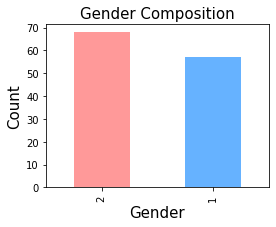

In [11]:
gender_counts = df["Gender"].value_counts()

plt.figure(figsize=(4, 3))
colors = ["#FF9999", "#66B2FF"]
gender_counts.plot.bar(color=colors)

plt.xlabel("Gender", fontsize=15)  # Increase xlabel size
plt.ylabel("Count", fontsize=15)  # Increase ylabel size
plt.title("Gender Composition", fontsize=15)  # Increase title size

plt.show()

### Age

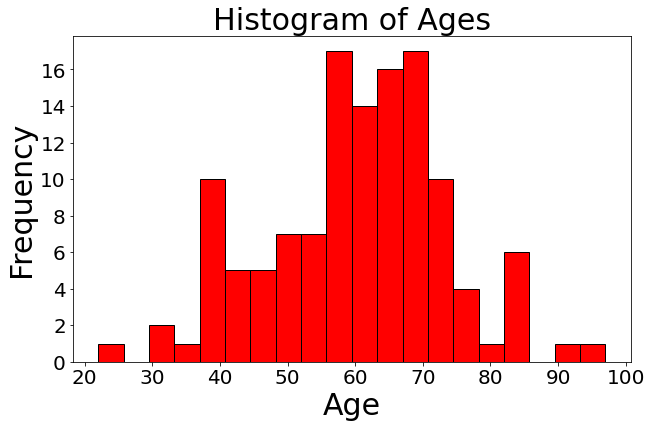

In [12]:
# Age
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df["Age"].values, bins=20, color="red", edgecolor="black")
plt.xlabel("Age", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.title("Histogram of Ages", fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

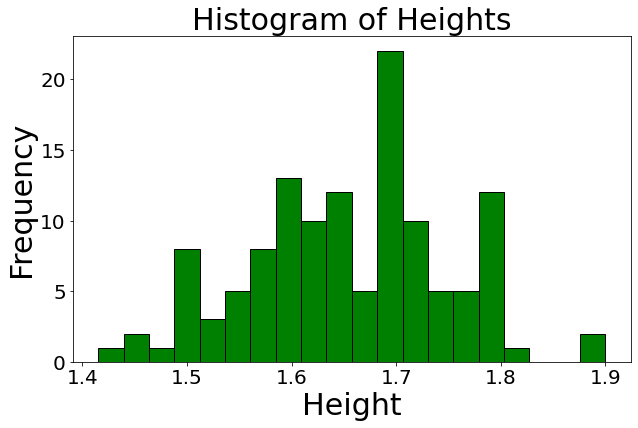

In [13]:
# Height
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(df["Height"].values, bins=20, color="green", edgecolor="black")
plt.xlabel("Height", fontsize=30)
plt.ylabel("Frequency", fontsize=30)
plt.title("Histogram of Heights", fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [14]:
type(df["Height"].unique()[0])

numpy.float64

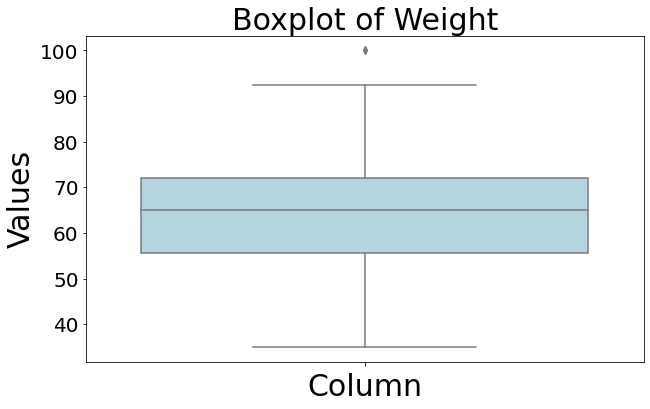

In [15]:
# Weight
column_name = "Weight"

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, y=column_name, color='lightblue')

plt.xlabel("Column", fontsize=30)
plt.ylabel("Values", fontsize=30)
plt.title("Boxplot of Weight", fontsize=30)

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()


In [16]:
type(df["Weight"].unique()[0])

numpy.float64

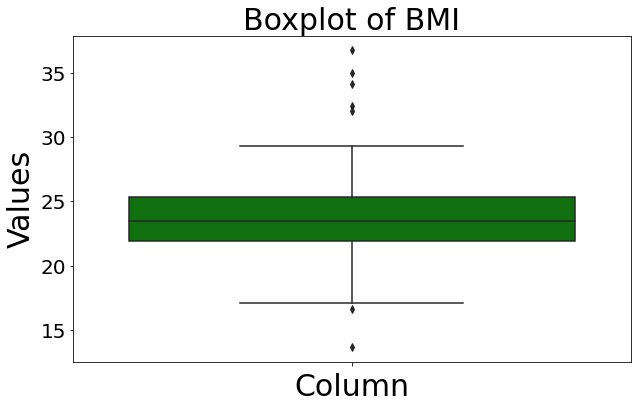

In [17]:
# BMI

plt.figure(figsize=(10, 6))  # Set the figure size to match the Weight boxplot

sns.boxplot(data=df, y="BMI", color='green')

plt.xlabel("Column", fontsize=30)
plt.ylabel("Values", fontsize=30)
plt.title("Boxplot of BMI", fontsize=30)

plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [18]:
type(df["BMI"].unique()[0])

numpy.float64

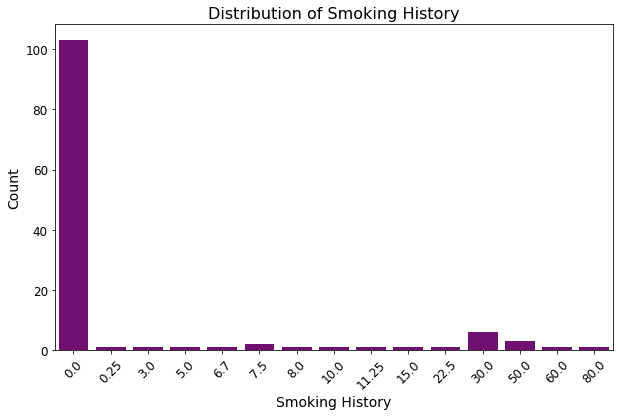

In [19]:
# Smoking History

smoking_history_counts = df["Smoking History"].value_counts().sort_index()
smoking_history_labels = smoking_history_counts.index
plt.figure(figsize=(10, 6))
sns.barplot(x=smoking_history_labels, y=smoking_history_counts, color='purple')

plt.xlabel("Smoking History", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Smoking History", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [20]:
type(df["Smoking History"].unique()[0])

numpy.float64

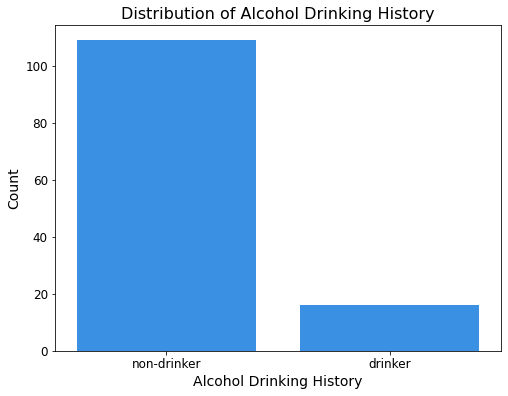

In [21]:
# Alcohol Drinking History
alcohol_history_counts = df["Alcohol Drinking History"].value_counts()
alcohol_history_labels = alcohol_history_counts.index

plt.figure(figsize=(8, 6))
sns.barplot(x=alcohol_history_labels, y=alcohol_history_counts, color='#1E90FF')

plt.xlabel("Alcohol Drinking History", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Alcohol Drinking History", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [22]:
# Label Encoding

df["Alcohol Drinking History"] = df["Alcohol Drinking History"].replace({'drinker': 1, 'non-drinker': 0})

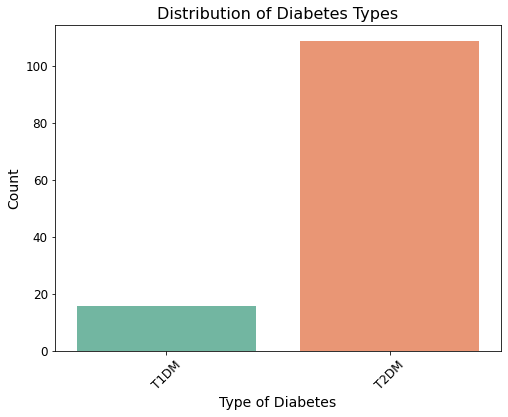

In [23]:
# Type of Diabetes
plt.figure(figsize=(8, 6))

# Create a countplot
sns.countplot(data=df, x='Type of Diabetes', palette='Set2')

plt.xlabel("Type of Diabetes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Diabetes Types", fontsize=16)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()

In [24]:
# Label Encoding

df["Type of Diabetes"] = df["Type of Diabetes"].replace({'T1DM': 1, 'T2DM': 0})

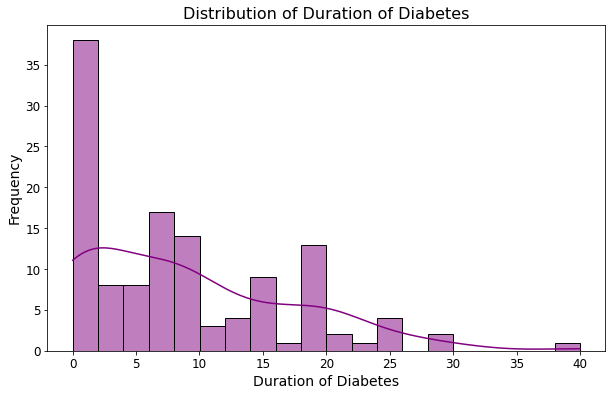

In [25]:
# Duration of Diabetes
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(df['Duration of Diabetes'], bins=20, color='purple', kde=True)

plt.xlabel("Duration of Diabetes", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Duration of Diabetes", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


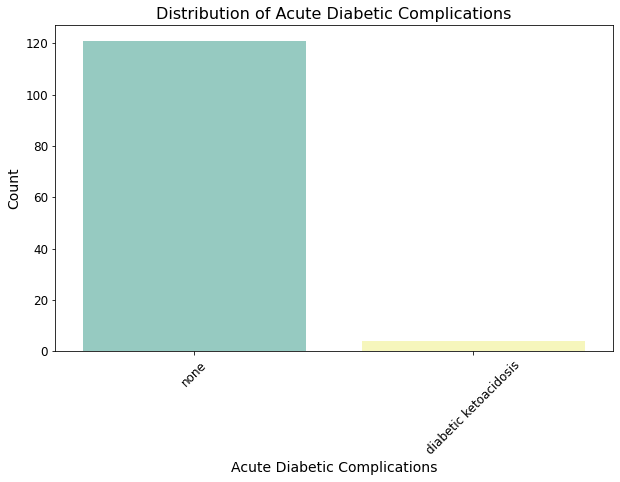

In [26]:
# Acute Diabetic Complications
plt.figure(figsize=(10, 6))

# Create a countplot
sns.countplot(data=df, x="Acute Diabetic Complications", palette="Set3")

plt.xlabel("Acute Diabetic Complications", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Acute Diabetic Complications", fontsize=16)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [27]:
df["Acute Diabetic Complications"] = df["Acute Diabetic Complications"].replace({'none': 0, 'diabetic ketoacidosis': 1})

###  Diabetic Macrovascular Complications

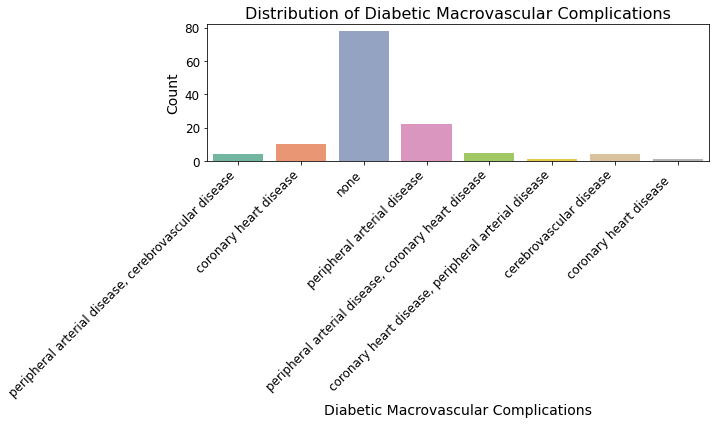

In [28]:
# Diabetic Macrovascular Complications
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.countplot(data=df, x="Diabetic Macrovascular Complications", palette="Set2")

plt.xlabel("Diabetic Macrovascular Complications", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Diabetic Macrovascular Complications", fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust label rotation

plt.yticks(fontsize=12)

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

In [29]:
unique_term_array = ["peripheral arterial disease" , "cerebrovascular disease",
                     "coronary heart disease" , "peripheral arterial disease"]

In [30]:
df_new = pd.DataFrame(0, index=range(125), columns=unique_term_array)
df = pd.concat([df_new, df], axis=1)

In [31]:
# Custom One Hot Encoding

for index, row in df.iterrows():
    diabetic_macrovascular_complications = row["Diabetic Macrovascular Complications"].split(", ")
    
    # Increment corresponding columns for each word in the array
    for word in diabetic_macrovascular_complications:
        print(word)
        if(word == "none"):
            continue
        df.at[index, word] += 1

peripheral arterial disease
cerebrovascular disease
coronary heart disease
coronary heart disease
coronary heart disease
none
peripheral arterial disease
none
none
none
none
none
coronary heart disease
coronary heart disease
none
none
none
none
none
none
peripheral arterial disease
coronary heart disease
peripheral arterial disease
coronary heart disease
peripheral arterial disease
none
peripheral arterial disease
peripheral arterial disease
peripheral arterial disease
cerebrovascular disease
none
peripheral arterial disease
coronary heart disease
peripheral arterial disease
peripheral arterial disease
none
none
none
none
none
none
none
peripheral arterial disease
coronary heart disease
peripheral arterial disease
peripheral arterial disease
peripheral arterial disease
peripheral arterial disease
peripheral arterial disease
peripheral arterial disease
coronary heart disease
peripheral arterial disease
peripheral arterial disease
cerebrovascular disease
peripheral arterial disease
cereb

KeyError: 'coronary heart disease  '

In [32]:
df.drop("Diabetic Macrovascular Complications" , axis = 1 , inplace = True)

### Diabetic Microvascular Complications

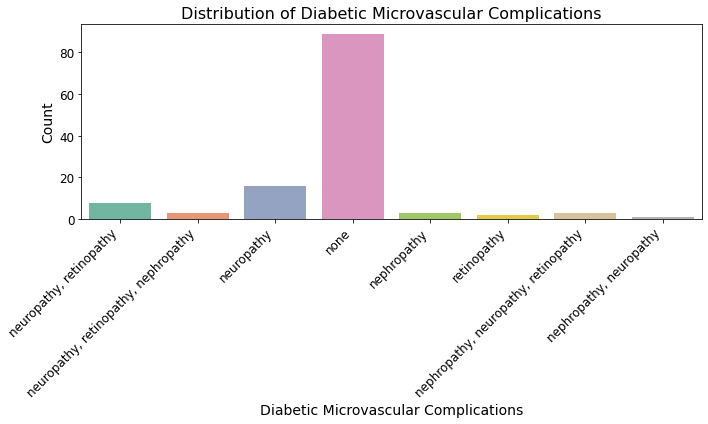

In [33]:
# Diabetic Microvascular Complications

plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.countplot(data=df, x="Diabetic Microvascular Complications", palette="Set2")

plt.xlabel("Diabetic Microvascular Complications", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Diabetic Microvascular Complications", fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)  # Adjust label rotation

plt.yticks(fontsize=12)

plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

In [34]:
df["Diabetic Microvascular Complications"].unique()
unique_terms = ['neuropathy', 'retinopathy', 'nephropathy' , 'none']
df_new = pd.DataFrame(0, index=range(125), columns=unique_terms)

In [35]:
df_new.columns

Index(['neuropathy', 'retinopathy', 'nephropathy', 'none'], dtype='object')

In [36]:
df = pd.concat([df_new, df], axis=1)

In [37]:
# Custom One Hot Encoding

for index, row in df.iterrows():
    diabetic_microvascular_complications = row["Diabetic Microvascular Complications"].split(", ")
    
    # Increment corresponding columns for each word in the array
    for word in diabetic_microvascular_complications:
        print(word)
        df.at[index, word] += 1

neuropathy
retinopathy
neuropathy
retinopathy
nephropathy
neuropathy
retinopathy
nephropathy
neuropathy
retinopathy
nephropathy
neuropathy
neuropathy
none
none
none
none
none
neuropathy
neuropathy
neuropathy
retinopathy
none
none
nephropathy
none
none
neuropathy
retinopathy
nephropathy
none
none
neuropathy
retinopathy
neuropathy
nephropathy
none
none
none
neuropathy
neuropathy
none
none
none
none
none
none
none
neuropathy
retinopathy
neuropathy
neuropathy
retinopathy
none
none
none
neuropathy
retinopathy
retinopathy
none
neuropathy
retinopathy
nephropathy
neuropathy
retinopathy
nephropathy
neuropathy
retinopathy
neuropathy
neuropathy
neuropathy
neuropathy
neuropathy
neuropathy
none
none
retinopathy
none
none
nephropathy
neuropathy
none
none
neuropathy
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
nephropathy
neuropathy
retinopathy
none
none
none
none
none
none
none
none
neuropathy
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
no

In [38]:
selected_columns = ["Diabetic Microvascular Complications", "neuropathy", "retinopathy", "nephropathy"]
df_selected = df[selected_columns]

random_sample = df_selected.sample(n=15)

random_sample

Diabetic Microvascular Complications  neuropathy  retinopathy  nephropathy
93                                  none           0            0            0
13               neuropathy, retinopathy           1            1            0
61               nephropathy, neuropathy           1            0            1
83                                  none           0            0            0
57                                  none           0            0            0
75                                  none           0            0            0
23               neuropathy, retinopathy           1            1            0
94                                  none           0            0            0
51                            neuropathy           1            0            0
91                                  none           0            0            0
80  nephropathy, neuropathy, retinopathy           1            1            1
6                                   none           0            0            0
92                                  none           0            0            0
12                            neuropathy           1            0            0
44               neuropathy, retinopathy           1            1            0

In [39]:
df.drop("Diabetic Microvascular Complications" , axis = 1 , inplace = True)

### Comorbidities

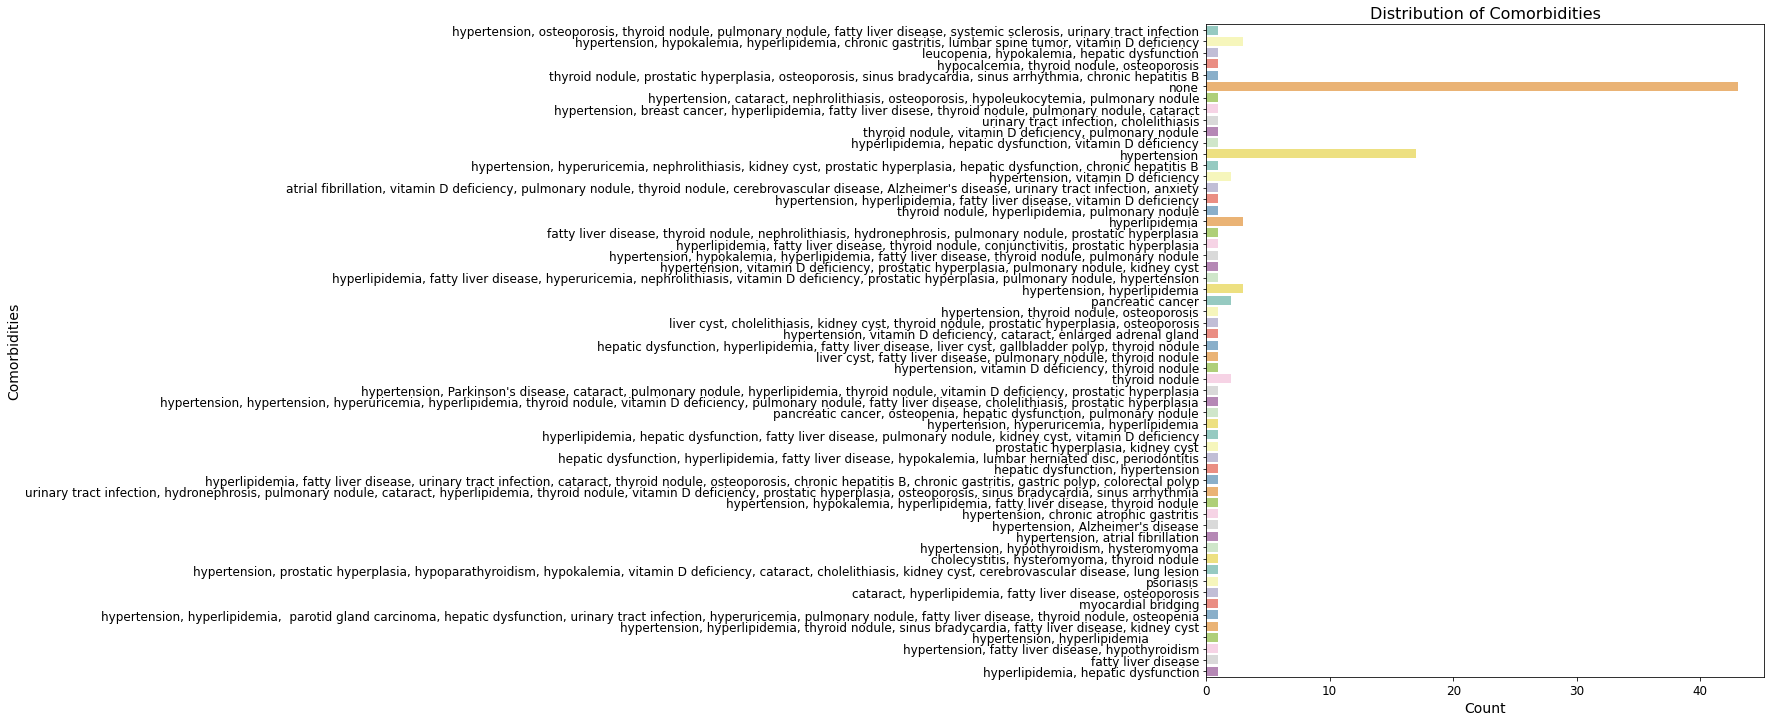

In [40]:
# Comorbidities
plt.figure(figsize=(10, 12))  # Increase figure height for better readability

# Create a horizontal bar plot
ax = sns.countplot(data=df, y="Comorbidities", palette="Set3")

plt.xlabel("Count", fontsize=14)
plt.ylabel("Comorbidities", fontsize=14)
plt.title("Distribution of Comorbidities", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [41]:
for word in df["Comorbidities"].unique():
    print("start: -> " , end ="")
    print(word)
    print()

start: -> hypertension, osteoporosis, thyroid nodule, pulmonary nodule, fatty liver disease, systemic sclerosis, urinary tract infection

start: -> hypertension, hypokalemia, hyperlipidemia, chronic gastritis, lumbar spine tumor, vitamin D deficiency

start: -> leucopenia, hypokalemia, hepatic dysfunction

start: -> hypocalcemia, thyroid nodule, osteoporosis

start: -> thyroid nodule, prostatic hyperplasia, osteoporosis, sinus bradycardia, sinus arrhythmia, chronic hepatitis B

start: -> none

start: -> hypertension, cataract, nephrolithiasis, osteoporosis, hypoleukocytemia, pulmonary nodule

start: -> hypertension, breast cancer, hyperlipidemia, fatty liver disese, thyroid nodule, pulmonary nodule, cataract

start: -> urinary tract infection, cholelithiasis

start: -> thyroid nodule, vitamin D deficiency, pulmonary nodule

start: -> hyperlipidemia, hepatic dysfunction, vitamin D deficiency

start: -> hypertension

start: -> hypertension, hyperuricemia, nephrolithiasis, kidney cyst, pr

In [42]:
# applying the same technique as applied in "Diabetic Microvascular Complications"
import re

unique_words = set()
for value in df["Comorbidities"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_term_array = list(unique_words)  # Convert set to list

print(len(unique_term_array))

78


In [43]:
# check if by any chance terms of Diabetic Microvascular Complications are clashing with the terms of Comorbidities

diabetic_microvascular_complications = ['neuropathy', 'retinopathy', 'nephropathy']
count = 0;
for word in unique_term_array:
    if(word in diabetic_microvascular_complications):
        print(word)
        count += 1
if(count == 0):
    print("No clashing of terminologies")

No clashing of terminologies


In [44]:
df_new = pd.DataFrame(0, index=range(125), columns=unique_term_array)
df = pd.concat([df_new, df], axis=1)

In [45]:
df_new.head()

systemic  D  gastritis  fibrillation  tract  hypoparathyroidism  atrial  \
0         0  0          0             0      0                   0       0   
1         0  0          0             0      0                   0       0   
2         0  0          0             0      0                   0       0   
3         0  0          0             0      0                   0       0   
4         0  0          0             0      0                   0       0   

   pulmonary  bridging  carcinoma  ...  breast  hyperlipidemia  bradycardia  \
0          0         0          0  ...       0               0            0   
1          0         0          0  ...       0               0            0   
2          0         0          0  ...       0               0            0   
3          0         0          0  ...       0               0            0   
4          0         0          0  ...       0               0            0   

   polyp  arrhythmia  deficiency  cerebrovascular  infection  cancer  parotid  
0      0           0           0                0          0       0        0  
1      0           0           0                0          0       0        0  
2      0           0           0                0          0       0        0  
3      0           0           0                0          0       0        0  
4      0           0           0                0          0       0        0  

[5 rows x 78 columns]

In [46]:
df.shape

(125, 116)

In [47]:
unique_term_array

['systemic',
 'D',
 'gastritis',
 'fibrillation',
 'tract',
 'hypoparathyroidism',
 'atrial',
 'pulmonary',
 'bridging',
 'carcinoma',
 'hypokalemia',
 'hypocalcemia',
 'pancreatic',
 'leucopenia',
 'conjunctivitis',
 'B',
 'hyperuricemia',
 'herniated',
 'disc',
 'thyroid',
 'hysteromyoma',
 'cataract',
 'prostatic',
 'kidney',
 'hepatitis',
 'anxiety',
 'sinus',
 'Parkinson',
 'osteopenia',
 's',
 'spine',
 'nephrolithiasis',
 'adrenal',
 'urinary',
 'hypertension',
 'hepatic',
 'nodule',
 'none',
 'cholecystitis',
 'periodontitis',
 'lung',
 'gallbladder',
 'fatty',
 'gland',
 'gastric',
 'liver',
 'cholelithiasis',
 'hypoleukocytemia',
 'sclerosis',
 'colorectal',
 'atrophic',
 'myocardial',
 'lumbar',
 'enlarged',
 'disese',
 'lesion',
 'hypothyroidism',
 'psoriasis',
 'Alzheimer',
 'hydronephrosis',
 'tumor',
 'osteoporosis',
 'disease',
 'dysfunction',
 'vitamin',
 'hyperplasia',
 'chronic',
 'cyst',
 'breast',
 'hyperlipidemia',
 'bradycardia',
 'polyp',
 'arrhythmia',
 'defici

In [48]:
# Custom One Hot Encoding

# Get unique words from the "Comorbidities" column
unique_words = set()
for value in df["Comorbidities"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_words_array = list(unique_words)  # Convert set to list

# Initialize columns for unique words with zeros
for word in unique_words_array:
    df[word] = 0

# Iterate through each row
for index, row in df.iterrows():
    diabetic_microvascular_complications = row["Comorbidities"].split(", ")
    
    # Increment corresponding columns for each word in the array
    for word in diabetic_microvascular_complications:
        if word in unique_words_array:
            df.at[index, word] += 1

# Drop the original 'Comorbidities' column if no longer needed
df = df.drop(columns=["Comorbidities"])

# Print each unique word with its frequency of occurrence
for word in unique_words_array:
    frequency = df[word].sum()
    print(f"Word: {word}, Frequency: {frequency}")


Word: systemic, Frequency: 0
Word: D, Frequency: 0
Word: gastritis, Frequency: 0
Word: fibrillation, Frequency: 0
Word: tract, Frequency: 0
Word: hypoparathyroidism, Frequency: 1
Word: atrial, Frequency: 0
Word: pulmonary, Frequency: 0
Word: bridging, Frequency: 0
Word: carcinoma, Frequency: 0
Word: hypokalemia, Frequency: 8
Word: hypocalcemia, Frequency: 1
Word: pancreatic, Frequency: 0
Word: leucopenia, Frequency: 1
Word: conjunctivitis, Frequency: 1
Word: B, Frequency: 0
Word: hyperuricemia, Frequency: 5
Word: herniated, Frequency: 0
Word: disc, Frequency: 0
Word: thyroid, Frequency: 0
Word: hysteromyoma, Frequency: 2
Word: cataract, Frequency: 8
Word: prostatic, Frequency: 0
Word: kidney, Frequency: 0
Word: hepatitis, Frequency: 0
Word: anxiety, Frequency: 1
Word: sinus, Frequency: 0
Word: Parkinson, Frequency: 0
Word: osteopenia, Frequency: 2
Word: s, Frequency: 0
Word: spine, Frequency: 0
Word: nephrolithiasis, Frequency: 4
Word: adrenal, Frequency: 0
Word: urinary, Frequency: 0


In [49]:
df.to_excel("PreprocessedShangaiDataset.xlsx")

In [50]:
df.shape

(125, 115)

In [51]:
# It has been identified that certain feature's values have only one unique value. Deleting those features whose values are 
# only of one type as keeping them is of no benefit to the prediction

# Identify columns with all values equal to 1
columns_to_drop = [col for col in df.columns if all(df[col] == 1)]

# Print columns to be dropped
print("Columns to be dropped:", columns_to_drop)

# Drop identified columns
df = df.drop(columns=columns_to_drop)

Columns to be dropped: ['none', 'none', 'peripheral arterial disease', 'peripheral arterial disease']


In [52]:
df.shape

(125, 111)

### Hypoglycemic Agents

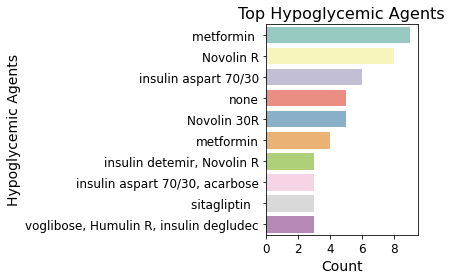

In [53]:
# Hypoglycemic Agents

# Get the top most frequent agents
top_hypoglycemic_agents = df["Hypoglycemic Agents"].value_counts().head(10)

# Create a horizontal bar plot
sns.barplot(x=top_hypoglycemic_agents, y=top_hypoglycemic_agents.index, palette="Set3")

plt.xlabel("Count", fontsize=14)
plt.ylabel("Hypoglycemic Agents", fontsize=14)
plt.title("Top Hypoglycemic Agents", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [54]:
# Same pipeline as Cormodities

import re

unique_words = set()
for value in df["Hypoglycemic Agents"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_term_array = list(unique_words)  # Convert set to list

print(len(unique_term_array))

30


In [55]:
df_new = pd.DataFrame(0, index=range(125), columns=unique_term_array)

In [56]:
df = pd.concat([df_new, df], axis=1)

In [57]:
# Custom One Hot Encoding

# Get unique words from the "Hypoglycemic Agents" column
unique_words = set()
for value in df["Hypoglycemic Agents"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_words_array = list(unique_words)  # Convert set to list

# Initialize columns for unique words with zeros
for word in unique_words_array:
    df[word] = 0

# Iterate through each row
for index, row in df.iterrows():
    diabetic_microvascular_complications = row["Hypoglycemic Agents"].split(", ")
    
    # Increment corresponding columns for each word in the array
    for word in diabetic_microvascular_complications:
        if word in unique_words_array:
            df.at[index, word] += 1

# Drop the original 'Comorbidities' column if no longer needed
df = df.drop(columns=["Hypoglycemic Agents"])

# Print each unique word with its frequency of occurrence
for word in unique_words_array:
    frequency = df[word].sum()
    print(f"Word: {word}, Frequency: {frequency}")


Word: 40R, Frequency: 0
Word: 30, Frequency: 0
Word: Novolin, Frequency: 0
Word: Humulin, Frequency: 0
Word: repaglinide, Frequency: 1
Word: insulin, Frequency: 0
Word: glargine, Frequency: 0
Word: none, Frequency: 5
Word: 30R, Frequency: 0
Word: degludec, Frequency: 0
Word: acarbose, Frequency: 25
Word: gliquidone, Frequency: 1
Word: glulisine, Frequency: 0
Word: voglibose, Frequency: 6
Word: pioglitazone, Frequency: 4
Word: detemir, Frequency: 0
Word: metformin, Frequency: 28
Word: sitagliptin, Frequency: 9
Word: 70, Frequency: 0
Word: canagliflozin, Frequency: 1
Word: aspart, Frequency: 0
Word: glarigine, Frequency: 0
Word: liraglutide, Frequency: 1
Word: dapagliflozin, Frequency: 5
Word: R, Frequency: 0
Word: glimepiride, Frequency: 1
Word: 50R, Frequency: 0
Word: Gansulin, Frequency: 0
Word: 50, Frequency: 0
Word: gliclazide, Frequency: 8


In [58]:
# It has been identified that certain feature's values have only one unique value. Deleting those features whose values are 
# only of one type as keeping them is of no benefit to the prediction

# Identify columns with all values equal to 1
columns_to_drop = [col for col in df.columns if all(df[col] == 1)]

# Print columns to be dropped
print("Columns to be dropped:", columns_to_drop)

# Drop identified columns
df = df.drop(columns=columns_to_drop)

Columns to be dropped: []


### Other Agents

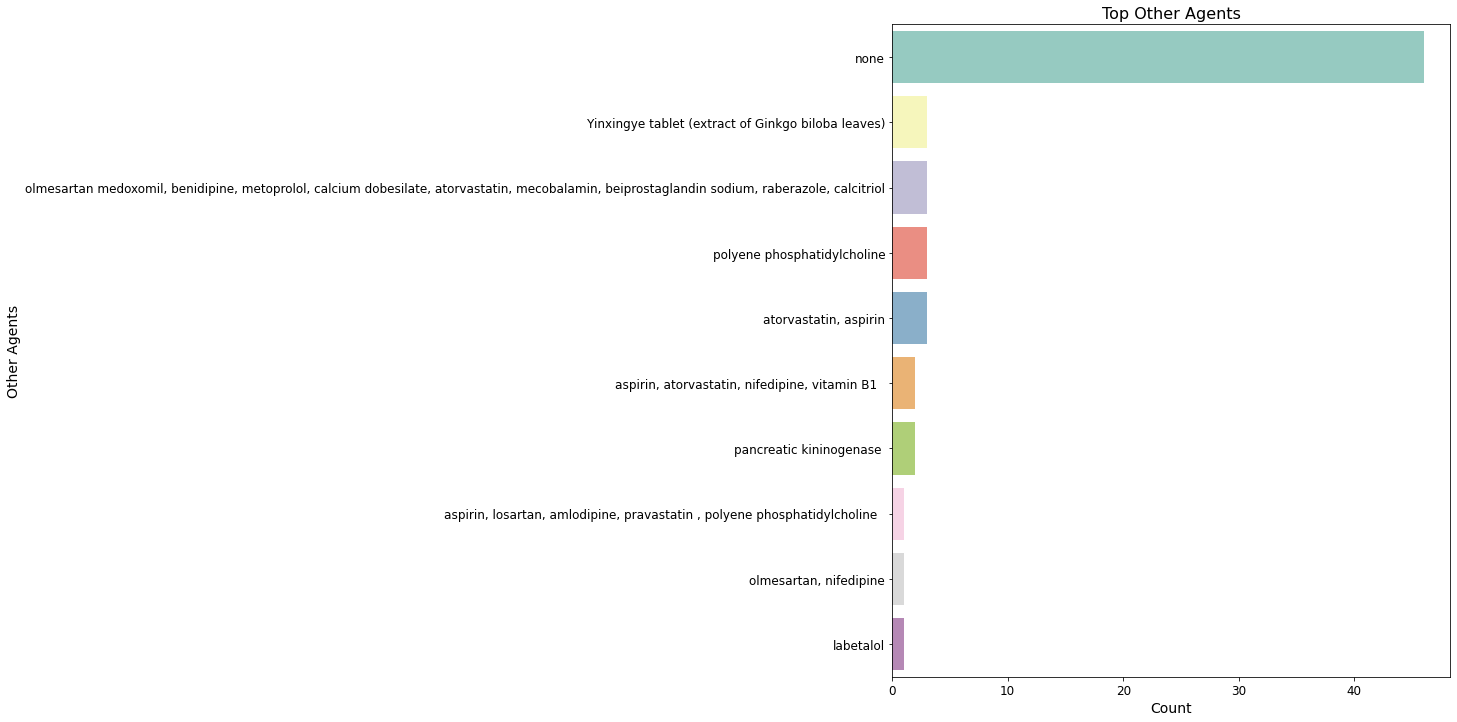

In [59]:
# Other Agents
plt.figure(figsize=(10, 12))  # Increase figure height for better readability

# Get the top most frequent agents
top_other_agents = df["Other Agents"].value_counts().head(10)

# Create a horizontal bar plot
sns.barplot(x=top_other_agents, y=top_other_agents.index, palette="Set3")

plt.xlabel("Count", fontsize=14)
plt.ylabel("Other Agents", fontsize=14)
plt.title("Top Other Agents", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [60]:
len(df["Other Agents"].unique())

70

In [61]:
# Same pipeline as Glycemic Agents

unique_words = set()
for value in df["Other Agents"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_term_array = list(unique_words)  # Convert set to list

print(len(unique_term_array))

93


In [62]:
for word in unique_term_array:
    print(word)

levothyroxine
trimetazidine
Yinxingye
Ning
tablet
extract
clopidogrel
patent
leucogen
betahistine
felodipine
fenofibrate
biloba
keto
glycyrrhizinate
pancreatic
doxazosin
rabeprazole
epalrestat
febuxostat
acid
medoxomil
Chinese
calcium
labetalol
bisoprolol
magnesium
diammonium
candesartan
benazepril
butyricum
Shutong
calcitriol
prostatic
telmisartan
α
clostridium
nifedipine
drug
beiprostaglandin
Shen
Qianlie
aspirin
quetiapine
isosorbide
multivitamin
olmesartan
capsule
hypertension
ezetimibe
chloride
allisartan
none
renal
pravastatin
bisacodyl
rosuvastatin
rivaroxaban
atorvastatin
carbonate
kininogenase
phosphatidylcholine
Zhenju
raberazole
isoglycyrrhizinate
mecobalamin
rosuvastatinqn
compound
of
valsartan
benidipine
levofloxacin
losartan
sodium
Jiangya
amlodipine
irbesartan
and
Shuai
dysfunction
vitamin
hyperplasia
metoprolol
polyene
B1
hydrochlorothiazide
Ginkgo
for
leaves
dobesilate
D3
potassium
mononitrate


In [63]:
df_new = pd.DataFrame(0, index=range(125), columns=unique_term_array)
df = pd.concat([df_new, df], axis=1)

In [64]:
# Custom One Hot Encoding

# Get unique words from the "Other Agents" column
unique_words = set()
for value in df["Other Agents"].unique():
    words = re.findall(r'\w+', value)  # Split string into words
    unique_words.update(words)  # Add words to the set of unique_words

unique_words_array = list(unique_words)  # Convert set to list

# Initialize columns for unique words with zeros
for word in unique_words_array:
    df[word] = 0

# Iterate through each row
for index, row in df.iterrows():
    diabetic_microvascular_complications = row["Other Agents"].split(", ")
    
    # Increment corresponding columns for each word in the array
    for word in diabetic_microvascular_complications:
        if word in unique_words_array:
            df.at[index, word] += 1

# Drop the original 'Comorbidities' column if no longer needed
df = df.drop(columns=["Other Agents"])

# Print each unique word with its frequency of occurrence
for word in unique_words_array:
    frequency = df[word].sum()
    print(f"Word: {word}, Frequency: {frequency}")


Word: levothyroxine, Frequency: 1
Word: trimetazidine, Frequency: 1
Word: Yinxingye, Frequency: 0
Word: Ning, Frequency: 0
Word: tablet, Frequency: 0
Word: extract, Frequency: 0
Word: clopidogrel, Frequency: 7
Word: patent, Frequency: 0
Word: leucogen, Frequency: 1
Word: betahistine, Frequency: 0
Word: felodipine, Frequency: 0
Word: fenofibrate, Frequency: 1
Word: biloba, Frequency: 0
Word: keto, Frequency: 0
Word: glycyrrhizinate, Frequency: 0
Word: pancreatic, Frequency: pancreatic    0
pancreatic    0
dtype: int64
Word: doxazosin, Frequency: 2
Word: rabeprazole, Frequency: 2
Word: epalrestat, Frequency: 18
Word: febuxostat, Frequency: 3
Word: acid, Frequency: 0
Word: medoxomil, Frequency: 0
Word: Chinese, Frequency: 0
Word: calcium, Frequency: 0
Word: labetalol, Frequency: 1
Word: bisoprolol, Frequency: 3
Word: magnesium, Frequency: 0
Word: diammonium, Frequency: 0
Word: candesartan, Frequency: 1
Word: benazepril, Frequency: 1
Word: butyricum, Frequency: 0
Word: Shutong, Frequency: 

In [65]:
# It has been identified that certain feature's values have only one unique value. Deleting those features whose values are 
# only of one type as keeping them is of no benefit to the prediction

# Identify columns with all values equal to 1
columns_to_drop = [col for col in df.columns if all(df[col] == 1)]

# Print columns to be dropped
print("Columns to be dropped:", columns_to_drop)

# Drop identified columns
df = df.drop(columns=columns_to_drop)

Columns to be dropped: ['pancreatic', 'prostatic', 'hypertension', 'none', 'dysfunction', 'vitamin', 'hyperplasia', 'none', 'pancreatic', 'prostatic', 'hypertension', 'dysfunction', 'vitamin', 'hyperplasia']


In [66]:
df.shape

(125, 218)

### Fasting Plasma Glucose

In [67]:
# Fasting Plasma Glucose
df["Fasting Plasma Glucose"].unique()

array([352.8, 181.8, 237.6, 120.6, 113.4, 84.6, 80.28, 258.3, 164.7,
       266.4, 250.20000000000002, 117.0, 342.0, 223.2, 82.44, 137.7,
       138.42, 158.4, 194.4, 257.40000000000003, 336.6, 156.6, 167.4,
       124.2, 176.4, 163.79999999999998, 334.8, 101.16, 109.26, 152.28,
       144.36, 159.84, 108.72, 135, 120.60000000000001, 198,
       199.79999999999998, 232.20000000000002, 216, 165.6,
       160.20000000000002, 140.4, 111.60000000000001, 183.6,
       214.20000000000002, 133.2, 207, 140.94, 275.40000000000003,
       187.20000000000002, 356.40000000000003, 338.93999999999994,
       55.800000000000004, 197.28, 161.82, 93.60000000000001, 126,
       208.79999999999998, 144, 129.6, 169.02, 131.4, 113.39999999999999,
       95.39999999999999, '/', 136.79999999999998, 106.2, 432, 284.4,
       172.8, 241.20000000000002, 104.39999999999999, 244.79999999999998,
       262.8, 93.42, 160.2, 90, 179.1, 149.4, 192.6, 104.4, 128.34, 93.6,
       162, 180, 173.7, 124.92], dtype=object)

In [68]:
total_slash_count = df["Fasting Plasma Glucose"].apply(lambda x: str(x).count('/')).sum()
print("Total count of '/' in 'Fasting Plasma Glucose' column:", total_slash_count)

Total count of '/' in 'Fasting Plasma Glucose' column: 3


In [69]:
# Replace the invalid values with the mod value for 'Fasting Plasma Glucose'

# Convert the column to numeric, replacing non-numeric values with NaN
df["Fasting Plasma Glucose"] = pd.to_numeric(df["Fasting Plasma Glucose"], errors="coerce")

# Calculate the mode value
mode_value = df["Fasting Plasma Glucose"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Fasting Plasma Glucose"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Fasting Plasma Glucose"] = df["Fasting Plasma Glucose"].astype(int)

167.4


In [70]:
total_slash_count = df["Fasting Plasma Glucose"].apply(lambda x: str(x).count('/')).sum()
print("Total count of '/' in 'Fasting Plasma Glucose' column:", total_slash_count)

Total count of '/' in 'Fasting Plasma Glucose' column: 0


In [71]:
values = df["Fasting Plasma Glucose"].unique()
print(type(values[0]))
print()
print(values)

print(df["Fasting Plasma Glucose"].value_counts())

<class 'numpy.int32'>

[352 181 237 120 113  84  80 258 164 266 250 117 342 223  82 137 138 158
 194 257 336 156 167 124 176 163 334 101 109 152 144 159 108 135 198 199
 232 216 165 160 140 111 183 214 133 207 275 187 356 338  55 197 161  93
 126 208 129 169 131  95 136 106 432 284 172 241 104 244 262  90 179 149
 192 128 162 180 173]
167    10
158     5
117     4
140     4
93      4
       ..
159     1
232     1
216     1
183     1
173     1
Name: Fasting Plasma Glucose, Length: 77, dtype: int64


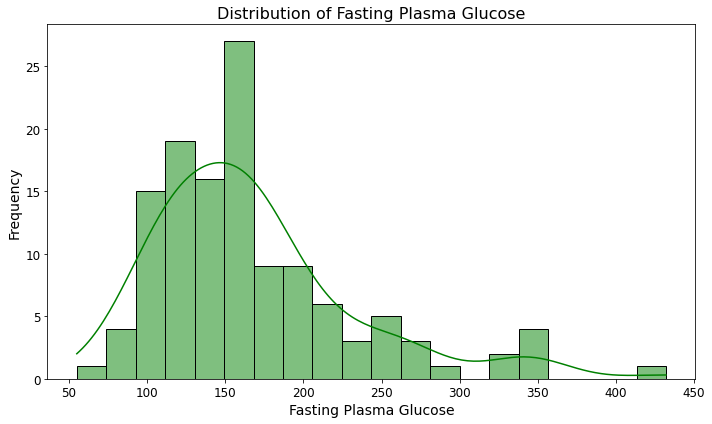

In [72]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Fasting Plasma Glucose"], bins=20, kde=True, color="green")

plt.xlabel("Fasting Plasma Glucose", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Fasting Plasma Glucose", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 2-hour Postprandial Plasma Glucose

In [73]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["2-hour Postprandial Plasma Glucose"] = pd.to_numeric(df["2-hour Postprandial Plasma Glucose"], errors="coerce")

# Calculate the mode value
mode_value = df["2-hour Postprandial Plasma Glucose"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["2-hour Postprandial Plasma Glucose"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["2-hour Postprandial Plasma Glucose"] = df["2-hour Postprandial Plasma Glucose"].astype(int)

164.34


In [74]:
df["2-hour Postprandial Plasma Glucose"].unique()

array([348, 258, 164, 248, 305, 370, 193, 245,  72, 297, 372, 176, 329,
       283, 162, 277, 442, 238, 228, 585, 273, 275, 301, 217, 395, 171,
       250, 333, 138, 180, 311, 296, 167, 340, 192, 298, 251, 304, 225,
       403, 240, 259, 221, 316, 361, 165, 330, 314, 196, 427, 323, 610,
       315, 487, 210, 367, 212, 173, 160, 327, 201, 155, 270, 223, 256,
       215, 234, 440, 369, 113, 396, 189,  97, 243, 144, 287, 136, 186,
       291, 288, 262, 227])

In [75]:
total_slash_count = df["2-hour Postprandial Plasma Glucose"].apply(lambda x: str(x).count('/')).sum()
print("Total count of '/' in 'Fasting Plasma Glucose' column:", total_slash_count)

Total count of '/' in 'Fasting Plasma Glucose' column: 0


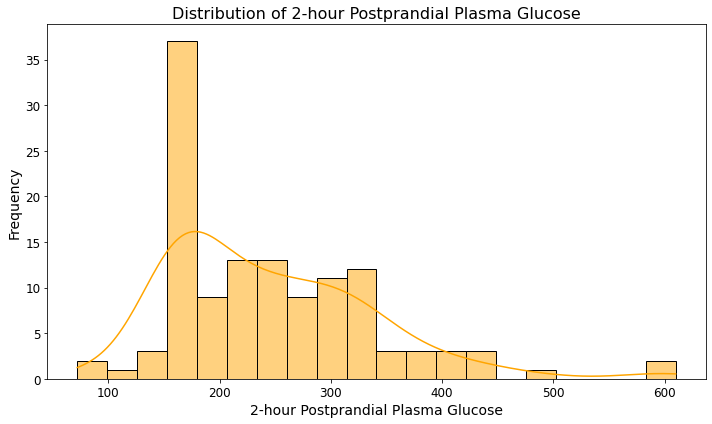

In [76]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["2-hour Postprandial Plasma Glucose"], bins=20, kde=True, color="orange")

plt.xlabel("2-hour Postprandial Plasma Glucose", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of 2-hour Postprandial Plasma Glucose", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Fasting C-peptide

In [77]:
# Fasting C-peptide
df["Fasting C-peptide"].unique()

array([0.05, 0.016, 0.1, 0.09, 0.02, 0.007, 0.013, 0.14, 0.15, 0.07, '/',
       0.27, 0.64, 0.31, 0.39, 0.44, 0.37, 0.65, 0.28, 0.56, 0.29, 0.2,
       0.51, 0.73, 0.6, 0.72, 0.34, 0.41, 0.43956000000000006, 0.22977,
       0.19, 0.16, 0.11, 0.5, 0.23, 0.42, 0.47, 0.57, 0.18, 0.21, 0.9,
       0.26, 0.48, 0.38, 0.62604, 0.53, 0.04, 1.1355300000000002, 0.43,
       0.3, 0.62, 0.49, 0.99, 0.32, 1.2187800000000002, 0.68, 0.67, 0.4,
       0.63, 0.36, 0.67266, 1.07559, 1.17882, 0.7825500000000001,
       1.1088900000000002, 1.23543, 0.97902], dtype=object)

In [78]:
total_slash_count = df["Fasting C-peptide"].apply(lambda x: str(x).count('/')).sum()
print("Total count of '/' in column:", total_slash_count)

Total count of '/' in column: 24


In [79]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Fasting C-peptide"] = pd.to_numeric(df["Fasting C-peptide"], errors="coerce")

# Calculate the mode value
mode_value = df["Fasting C-peptide"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Fasting C-peptide"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Fasting C-peptide"] = df["Fasting C-peptide"].astype(int)

0.016


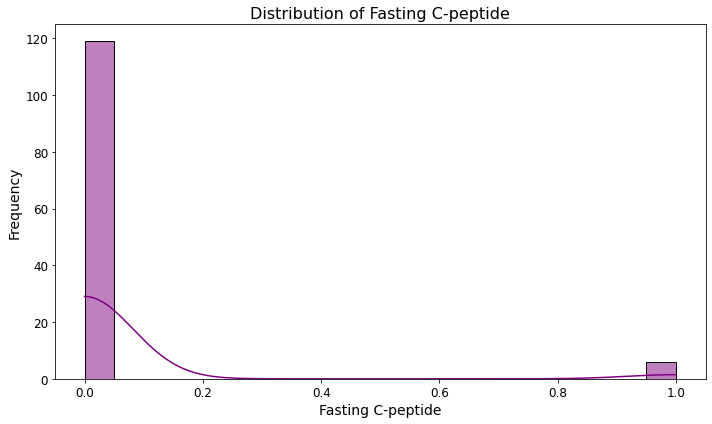

In [80]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Fasting C-peptide"], bins=20, kde=True, color="purple")

plt.xlabel("Fasting C-peptide", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Fasting C-peptide", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

#### 2-hour Postprandial C-peptide

In [81]:
df["2-hour Postprandial C-peptide"].unique()

array([0.05, 0.016, 0.12, 0.28, 0.06, 0.007, 0.01, 0.27, 0.23, 0.16, '/',
       0.91, 2.32, 0.97, 0.68, 0.81, 0.4, 1.16, 0.41, 0.48, 0.7, 0.87,
       0.85, 1.75, 0.67, 1, 2.17, 1.01, 0.19, 0.43, 0.89, 0.15, 0.56,
       0.99, 0.29, 0.74, 0.88, 0.3, 0.55, 0.92, 0.54, 0.42, 0.76, 0.77,
       0.38, 0.26, 2.24, 2.59, 1.07, 0.69, 4.42, 1.33, 0.17, 1.32, 1.88,
       0.73, 0.86, 2.04, 1.74, 0.45], dtype=object)

In [82]:
total_slash_count = df["2-hour Postprandial C-peptide"].apply(lambda x: str(x).count('/')).sum()
print("Total count of '/' in column:", total_slash_count)

Total count of '/' in column: 46


In [83]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["2-hour Postprandial C-peptide"] = pd.to_numeric(df["2-hour Postprandial C-peptide"], errors="coerce")

# Calculate the mode value
mode_value = df["2-hour Postprandial C-peptide"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["2-hour Postprandial C-peptide"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["2-hour Postprandial C-peptide"] = df["2-hour Postprandial C-peptide"].astype(int)

0.016


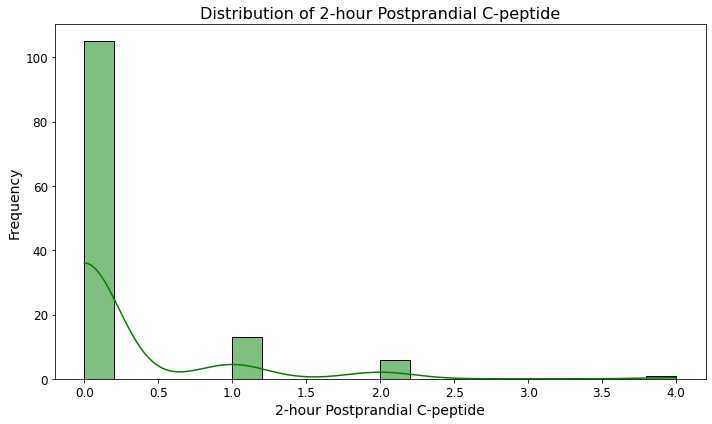

In [84]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["2-hour Postprandial C-peptide"], bins=20, kde=True, color="green")

plt.xlabel("2-hour Postprandial C-peptide", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of 2-hour Postprandial C-peptide", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Fasting Insulin

In [85]:
df["Fasting Insulin"].unique()

array(['/', 543.38, 78.37, 238.09, 30.18, 17.04, 21.66, 14.49, 311.76,
       61.55, 7.28, 87.6, 113.34, 130.8, 75.27, 57.84, 49.45, 89.63,
       39.83, 30.99, 36.08, 67.15, 83.5, 128.29, 46.6, 33.24, 55.8, 16.38,
       23.04, 29.160000000000004, 16.919999999999998, 33.26, 32.9, 113.78,
       136.46, 345.12, 55.95, 38.69, 86.21, 61.61, 119.81, 140.54, 104.42,
       2089.8, 46.56, 53.27, 52.87, 38.31, 23.07, 934.34,
       117.60000000000001, 52.91, 70.62, 68.61, 80.53, 32.24, 122.96,
       18.6, 67.37, 181.68, 64.58, 106.19999999999999, 86.66, 37.68,
       29.03, 10.73, 94.76, 43.28, 353.98, 43.39, 97.85, 34.77, 62.29,
       83.57, 60.43, 63.239999999999995, 69.9, 89.64, 46.08,
       171.42000000000002, 125.10000000000001, 17.580000000000002, 78.06],
      dtype=object)

In [86]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Fasting Insulin"] = pd.to_numeric(df["Fasting Insulin"], errors="coerce")

# Calculate the mode value
mode_value = df["Fasting Insulin"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Fasting Insulin"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Fasting Insulin"] = df["Fasting Insulin"].astype(int)

29.03


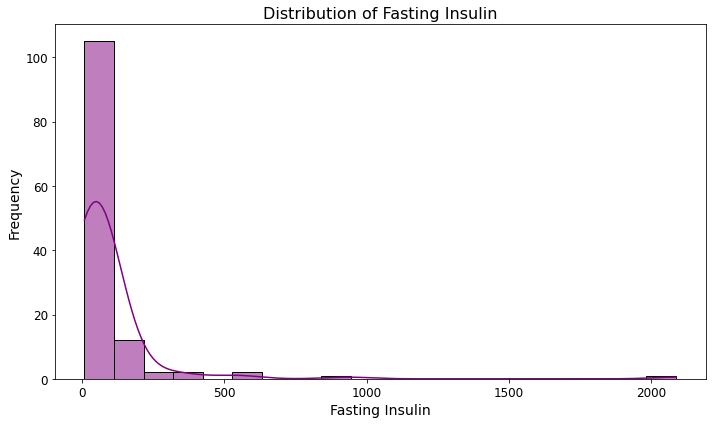

In [87]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Fasting Insulin"], bins=20, kde=True, color="purple")

plt.xlabel("Fasting Insulin", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Fasting Insulin", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 2-hour Postprandial Insulin

In [88]:
df["2-hour Postprandial Insulin"].unique()

array(['/', 754.71, 74.39, 550.4, 231.6, 445.8, 540.6, 28.74, 240.58,
       282.11, 508.8, 558.9, 249, 233.46, 125.57, 387.04, 247.11, 41.25,
       108.42, 446.54, 262.28, 137.74, 458.48, 307.67, 134.39999999999998,
       285.6, 80.4, 76.8, 34.58, 216.86, 272.2, 119.42, 353.5, 234.13,
       203.52, 293.13, 141.31, 157.4, 211.51, 375.11, 2089.8, 59.72,
       50.03, 212.14, 66.85, 920.8, 519.1, 264.32, 346.58, 476.13, 111.96,
       1228.93, 152.29, 404.07, 260.47, 69.6, 313.85, 85.75, 85.76,
       455.74, 197.52, 340.98, 431.19], dtype=object)

In [89]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["2-hour Postprandial Insulin"] = pd.to_numeric(df["2-hour Postprandial Insulin"], errors="coerce")

# Calculate the mode value
mode_value = df["2-hour Postprandial Insulin"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["2-hour Postprandial Insulin"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["2-hour Postprandial Insulin"] = df["2-hour Postprandial Insulin"].astype(int)

197.52


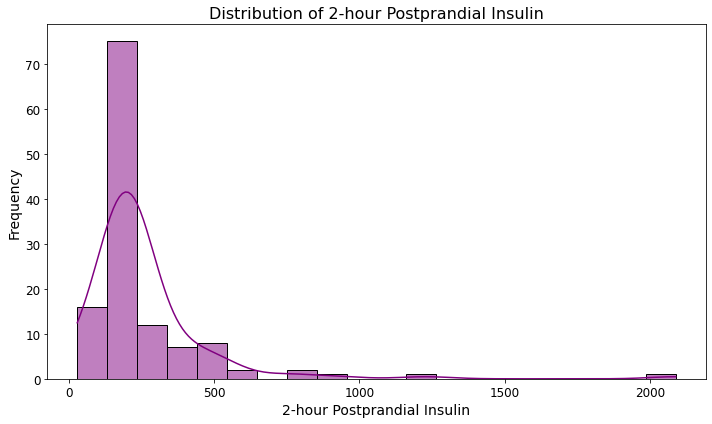

In [90]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["2-hour Postprandial Insulin"], bins=20, kde=True, color="purple")

plt.xlabel("2-hour Postprandial Insulin", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of 2-hour Postprandial Insulin", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### HbA1c

In [91]:
df["HbA1c"].unique()

array([115.31099999999998, 69.405, 72.68400000000001, 121.869, 125.148,
       68.312, 63.94, 60.661, 54.102999999999994, 62.84700000000001,
       78.149, 165.589, '/', 59.568, 57.382000000000005, 56.289,
       77.05599999999998, 80.335, 92.35799999999999, 104.38099999999999,
       94.54400000000001, 75.963, 74.87, 100.009, 46.452,
       65.03299999999999, 66.12599999999999, 45.358999999999995, 71.591,
       120.77599999999998, 144.822, 105.47400000000002, 137.171, 127.334,
       108.75299999999999, 91.265, 101.102, 87.98599999999999, 95.637,
       83.614, 93.451, 124.055, 34.428999999999995, 48.63799999999999,
       103.288, 53.00999999999999, 49.730999999999995, 40.98700000000001,
       44.266000000000005, 67.21900000000001, 51.917, 43.17299999999999,
       55.196, 102.195, 42.08, 81.428, 50.824, 113.125,
       23.498999999999995, 97.823, 58.474999999999994, 86.89299999999999],
      dtype=object)

In [92]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["HbA1c"] = pd.to_numeric(df["HbA1c"], errors="coerce")

# Calculate the mode value
mode_value = df["HbA1c"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["HbA1c"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["HbA1c"] = df["HbA1c"].astype(int)

59.568


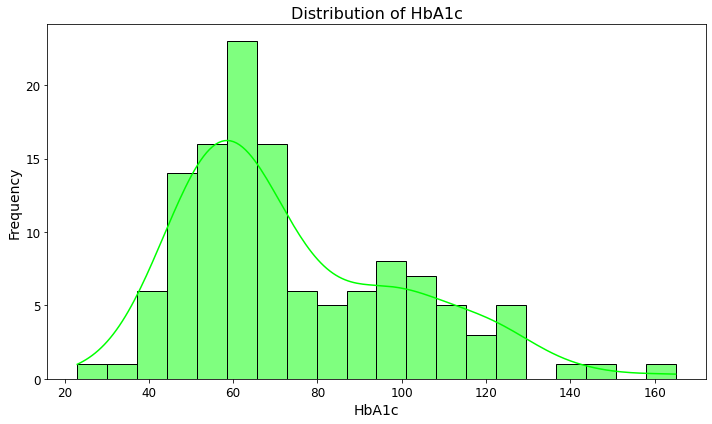

In [93]:
plt.figure(figsize=(10, 6))

# Create a KDE plot with filled area using a bright green color
sns.histplot(df["HbA1c"], bins=20, kde=True, fill=True, color="#00FF00")

plt.xlabel("HbA1c", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of HbA1c", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Glycated Albumin

In [94]:
df["Glycated Albumin"].unique()

array([40.7, 19.6, 25.1, 46.6, 37.6, 25.7, 29.2, 27, 26.6, 18.3, 20.1,
       24.9, 71.1, 21, '/', 14.9, 15.3, 17, 29.8, 19.5, 38.1, 33.3, 32.1,
       21.5, 39.8, 25.4, 20, 21.1, 36.3, 16, 14.6, 22.4, 22.5, 22.1, 17.1,
       22.6, 35.1, 18.9, 50.9, 17.9, 28.2, 39.5, 24.7, 31.1, 30, 42.2,
       37.2, 23.7, 29.5, 34.6, 27.4, 28.6, 18.2, 29.3, 19.8, 29.6, 33.9,
       30.9, 40.9, 16.5, 13.2, 17.2, 26.8, 13.9, 20.3, 11.9, 14.2, 24.2,
       7.1, 20.5, 17.3, 20.4, 18.6, 41.9, 28.4, 15.6, 11.2, 19.1, 27.7,
       14, 21.4, 10.6, 15.9, 18], dtype=object)

In [95]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Glycated Albumin"] = pd.to_numeric(df["Glycated Albumin"], errors="coerce")

# Calculate the mode value
mode_value = df["Glycated Albumin"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Glycated Albumin"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Glycated Albumin"] = df["Glycated Albumin"].astype(int)

22.6


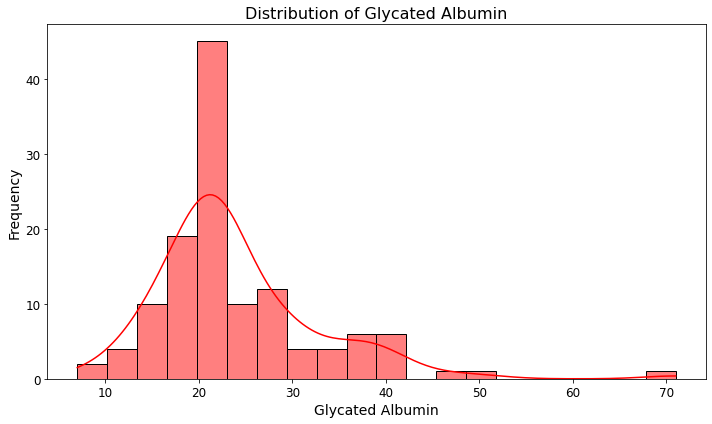

In [96]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE using a red color
sns.histplot(df["Glycated Albumin"], bins=20, kde=True, color="red")

plt.xlabel("Glycated Albumin", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Glycated Albumin", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### High-Density Lipoprotein Cholestrol

In [97]:
df["High-Density Lipoprotein Cholesterol"].unique()

array([0.86, 0.93, 0.84, 1.08, 1.27, 1.57, 1.97, 1.88, 1.72, 1.84, 0.77,
       0.9, 1.98, 1.48, 2.33, 2.28, 1.36, 1.13, 1.33, 0.91, 0.71, 1.11,
       1.03, 2.56, 0.89, 1, 0.99, 1.29, 1.39, 1.31, 1.77, '/', 0.83, 1.35,
       1.16, 1.22, 1.18, 0.92, 1.14, 0.94, 0.85, 0.69, 1.1, 0.97, 1.38,
       1.47, 0.95, 0.82, 1.43, 0.81, 0.96, 1.71, 1.34, 1.01, 1.3, 0.88,
       1.21, 1.09, 1.06, 1.92, 1.07, 1.24, 2.06], dtype=object)

In [98]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["High-Density Lipoprotein Cholesterol"] = pd.to_numeric(df["High-Density Lipoprotein Cholesterol"], errors="coerce")

# Calculate the mode value
mode_value = df["High-Density Lipoprotein Cholesterol"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["High-Density Lipoprotein Cholesterol"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["High-Density Lipoprotein Cholesterol"] = df["High-Density Lipoprotein Cholesterol"].astype(int)

0.82


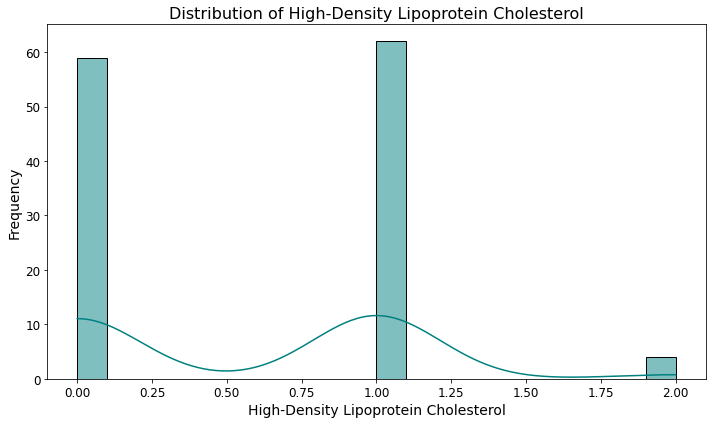

In [99]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE using a teal color
sns.histplot(df["High-Density Lipoprotein Cholesterol"], bins=20, kde=True, color="teal")

plt.xlabel("High-Density Lipoprotein Cholesterol", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of High-Density Lipoprotein Cholesterol", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Total Cholestrol

In [100]:
df["Total Cholesterol"].unique()

array([3.59, 4.78, 3.49, 5.61, 4.57, 4.05, 4.44, 5.12, 4.27, 5.09, 4.55,
       5.46, 5.15, 4.64, 4.69, 4.07, 4.36, 4.28, 5.31, 4.73, 2.63, 7.35,
       6.19, 6.29, 2.91, 3.36, 6.02, 5.57, 3.58, 3.03, 2.99, 2.86, 4.52,
       5.68, '/', 5.52, 4.24, 3.32, 4.51, 5.45, 5.96, 3.68, 5.2, 5.97,
       6.25, 4.13, 4.53, 3.34, 5.87, 6.71, 2.51, 6.66, 6.07, 4.01, 4.61,
       5.41, 5.21, 3.61, 6.12, 6.98, 6.74, 5.48, 4.83, 5.83, 4.82, 3.62,
       4.39, 4.08, 3.4, 4.9, 4.18, 4.56, 7.79, 4.19, 6.39, 3.85, 4.34,
       3.81, 4.96, 6.57, 3.79, 4.66, 5.07, 6.65, 4, 4.45, 4.87, 5.49, 5.9],
      dtype=object)

In [101]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Total Cholesterol"] = pd.to_numeric(df["Total Cholesterol"], errors="coerce")

# Calculate the mode value
mode_value = df["Total Cholesterol"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Total Cholesterol"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Total Cholesterol"] = df["Total Cholesterol"].astype(int)

4.34


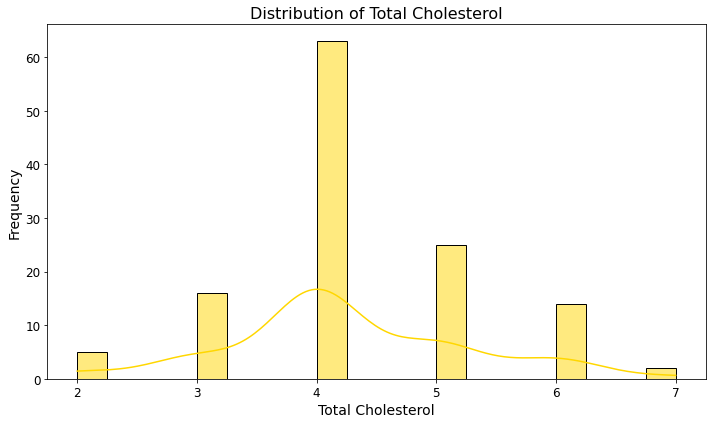

In [102]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE using a gold color
sns.histplot(df["Total Cholesterol"], bins=20, kde=True, color="gold")

plt.xlabel("Total Cholesterol", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Total Cholesterol", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Triglyceride

In [103]:
df["Triglyceride"].unique()

array([1.02, 2.2, 1.82, 1.14, 0.91, 0.46, 0.68, 0.64, 0.54, 1.57, 1.77,
       1.03, 0.74, 0.61, 0.89, 0.93, 1.32, 1.73, 1.53, 7.65, 2.45, 1.48,
       0.79, 1.55, 1.65, 3.69, 1.5, 1.8, 0.99, 0.78, 1.34, 1.38, 0.75,
       '/', 1.28, 1.21, 1.36, 0.77, 3.3, 2.24, 1.44, 1.12, 1.24, 2.98,
       2.59, 1.71, 2.03, 0.67, 2.31, 3.97, 1.15, 3.06, 3.89, 1.61, 0.82,
       1.43, 1.22, 1.81, 1.06, 1.05, 5.02, 2.02, 1.56, 1.45, 1.68, 1.98,
       0.73, 1.52, 1.63, 1.62, 1.96, 2.58, 2.84, 1.08, 1.67, 0.92, 2.15,
       1.54, 1.93, 1.75, 2.43, 1.01, 0.72, 1.69, 3.51, 2.21], dtype=object)

In [104]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Triglyceride"] = pd.to_numeric(df["Triglyceride"], errors="coerce")

# Calculate the mode value
mode_value = df["Triglyceride"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Triglyceride"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Triglyceride"] = df["Triglyceride"].astype(int)

1.67


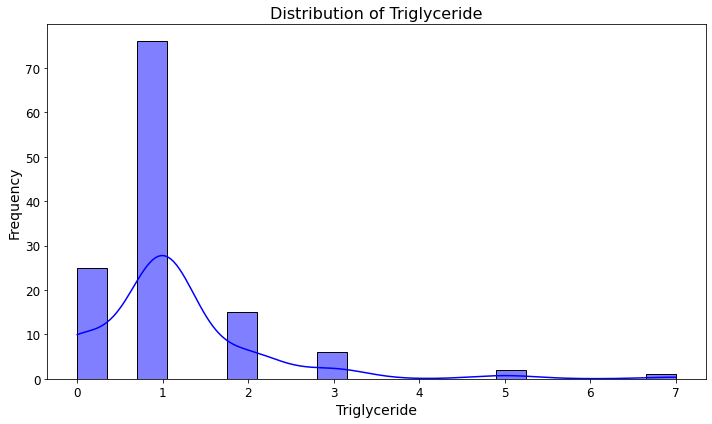

In [105]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Triglyceride"], bins=20, kde=True, color="blue")

plt.xlabel("Triglyceride", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Triglyceride", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Low-Density Lipoprotein Cholestrol

In [106]:
df["Low-Density Lipoprotein Cholesterol"].unique()

array([2.01, 3.28, 1.83, 3.95, 2.76, 2.12, 2.57, 2.93, 2.63, 2.7, 3.29,
       4.25, 2.71, 2.46, 1.74, 1.86, 2.89, 2.94, 3.68, 2.95, 1.19, 4.04,
       4.55, 1.82, 2.19, 4.94, 4.44, 2.33, 1.8, 1.7, 1.47, 3.18, 4.18,
       3.43, '/', 3.19, 2.82, 2.97, 3.08, 3.67, 3.62, 3.36, 3.87, 4.21,
       1.94, 2.92, 1.72, 3.8, 3.83, 1.14, 5.07, 3.96, 3.27, 3.56, 3.91,
       3.89, 1.67, 4.11, 5.26, 4.4, 3.34, 4, 3, 0.98, 2.06, 2.49, 1.62,
       2.25, 2.04, 4.45, 1.85, 5.27, 3.69, 2.68, 4.08, 3.72, 2.58, 2.56,
       3.85, 2.52, 3.15, 3.66, 3.76, 4.61, 2.55, 2.17, 4.35, 4.05, 2.27,
       3.65], dtype=object)

In [107]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Low-Density Lipoprotein Cholesterol"] = pd.to_numeric(df["Low-Density Lipoprotein Cholesterol"], errors="coerce")

# Calculate the mode value
mode_value = df["Low-Density Lipoprotein Cholesterol"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Low-Density Lipoprotein Cholesterol"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Low-Density Lipoprotein Cholesterol"] = df["Low-Density Lipoprotein Cholesterol"].astype(int)

3.28


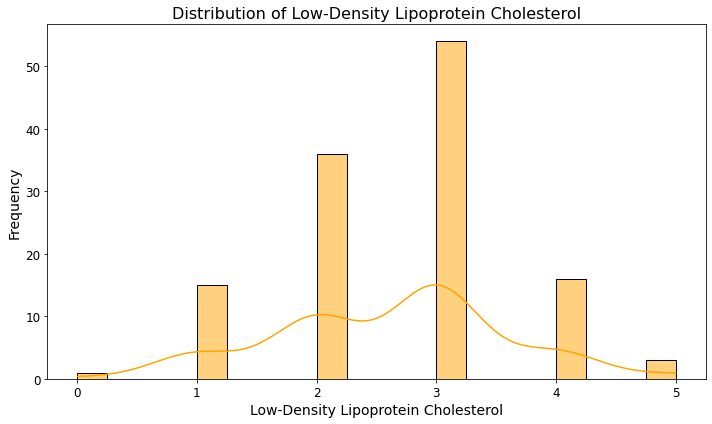

In [108]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Low-Density Lipoprotein Cholesterol"], bins=20, kde=True, color="orange")

plt.xlabel("Low-Density Lipoprotein Cholesterol", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Low-Density Lipoprotein Cholesterol", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Creatinine

In [109]:
df["Creatinine"].unique()

array([37.3, 66.8, 69.4, 63.7, 49.6, 45.2, 75.4, 74, 82, 73, 64.4, 54.9,
       71, 22.6, 30.4, '/', 105, 41, 39, 71.5, 36.9, 49, 47.8, 27.7, 87.2,
       70, 47.4, 40, 43.5, 86, 58.1, 66, 63, 69, 57, 53.8, 68.9, 57.6,
       72.4, 53.3, 56.3, 45.3, 62.8, 82.6, 118, 57.2, 83.7, 63.8, 60.2,
       63.6, 122.3, 40.5, 60.6, 31, 41.1, 54.4, 52.4, 48.5, 73.3, 50.9,
       61.9, 46.9, 68.8, 66.3, 87.1, 53.5, 44, 62, 66.7, 48.8, 98, 81.5,
       70.5, 60.4, 111.3, 73.2, 32.4, 45.7, 90, 48.6, 86.2, 55.2, 68.6,
       42.9, 71.6, 70.4, 94.8, 136.1, 69.1, 91, 54.3, 72], dtype=object)

In [110]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Creatinine"] = pd.to_numeric(df["Creatinine"], errors="coerce")

# Calculate the mode value
mode_value = df["Creatinine"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Creatinine"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Creatinine"] = df["Creatinine"].astype(int)

32.4


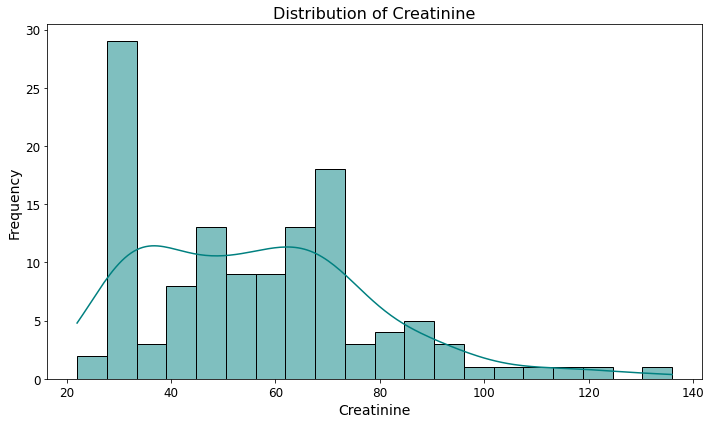

In [111]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Creatinine"], bins=20, kde=True, color="teal")

plt.xlabel("Creatinine", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Creatinine", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Estimated Glomerular Filtration Rate

In [112]:
df["Estimated Glomerular Filtration Rate"].unique()

array([160, 109, 104, 115, 174, 127, 98, 97, 91, 100, 78, 286, 214, '/',
       68, 101, 103, 105, 166, 113, 120, 257, 80, 106, 165, 223, 210, 83,
       123, 99, 102, 132, 95, 107, 90, 85, 57, 133, 84, 145, 126, 139,
       121, 53, 247, 146, 137, 119, 72, 135, 122, 111, 141.7, 82, 96, 79,
       125, 67, 88, 118, 44, 74, 178, 172, 76, 124, 144, 116, 75, 34, 86,
       73], dtype=object)

In [113]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Estimated Glomerular Filtration Rate"] = pd.to_numeric(df["Estimated Glomerular Filtration Rate"], errors="coerce")

# Calculate the mode value
mode_value = df["Estimated Glomerular Filtration Rate"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Estimated Glomerular Filtration Rate"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Estimated Glomerular Filtration Rate"] = df["Estimated Glomerular Filtration Rate"].astype(int)

104.0


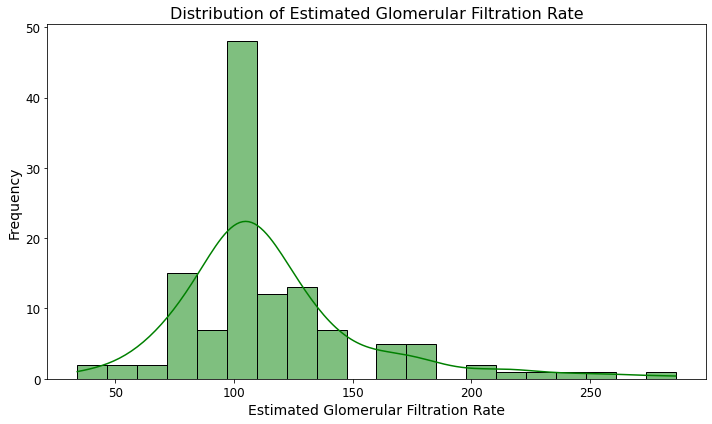

In [114]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Estimated Glomerular Filtration Rate"], bins=20, kde=True, color="green")

plt.xlabel("Estimated Glomerular Filtration Rate", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Estimated Glomerular Filtration Rate", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Uric Acid

In [115]:
df["Uric Acid"].unique()

array([188.86, 342.57, 322.18, 342.34, 93.39, 240.61, 205.48, 247, 257,
       201, 372.01, 285.12, 351.16, 140.32, 196.92, '/', 245, 337, 262,
       475.6, 490.05, 230.09, 320.27, 172.62, 202.88, 282.41, 241.6,
       269.65, 268.03, 345.19, 463.68, 246, 311, 352, 302.81, 328.59,
       324.8, 261.3, 437.72, 328.23, 187.89, 207.92, 175.34, 282.08,
       470.11, 250.15, 547.9, 283.01, 291.87, 419.13, 313.49, 398.46,
       363.7, 494, 135.95, 273.3, 247.74, 355.96, 298.35, 383.92, 338,
       563.96, 309.59, 290.66, 319.23, 243.98, 520.64, 391.73, 216.93,
       368.54, 240.01, 364.67, 368.37, 551.63, 320.03, 420.44, 312.12,
       388.9, 314.83, 262.4, 206.26, 277, 429.72, 357.46, 422.26, 535.76,
       335.18, 424.26, 334.68, 479.12, 497.78, 332.83, 259, 362.75, 369],
      dtype=object)

In [116]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Uric Acid"] = pd.to_numeric(df["Uric Acid"], errors="coerce")

# Calculate the mode value
mode_value = df["Uric Acid"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Uric Acid"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Uric Acid"] = df["Uric Acid"].astype(int)

206.26


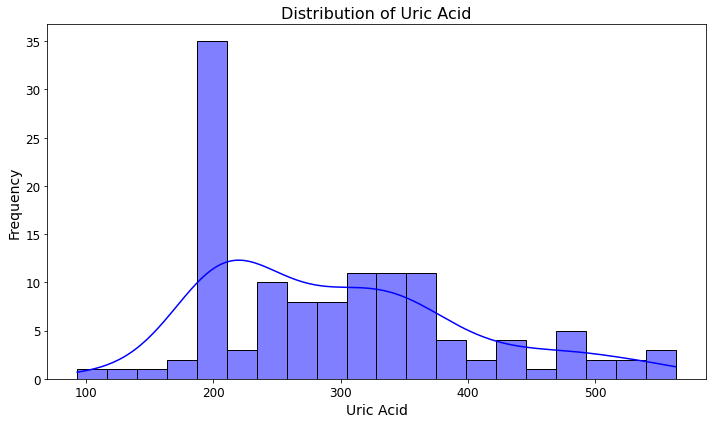

In [117]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Uric Acid"], bins=20, kde=True, color="blue")

plt.xlabel("Uric Acid", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Uric Acid", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Blood Urea Nitrogen

In [118]:
df["Blood Urea Nitrogen"].unique()

array([6.47, 6.05, 3.06, 6.21, 1.85, 3.98, 3.96, 6.4, 7.3, 6.5, 5.37,
       5.13, 2.98, 4.88, '/', 4.9, 5.6, 3.7, 4.74, 5.54, 5.9, 3.77, 9.51,
       6.16, 1.81, 4.5, 6.09, 4.4, 5.64, 4, 3.6, 5.5, 7, 5.2, 8.23, 7.04,
       6.9, 6.94, 7.44, 5.46, 4.96, 7.55, 10.48, 5.58, 6.59, 6.86, 5.19,
       5.33, 7.77, 3.35, 6.32, 2.68, 3.33, 5.94, 5.49, 5.36, 10.33, 6.04,
       3.44, 7.28, 7.57, 5.75, 4.95, 5.01, 7.85, 4.76, 8.13, 5.47, 8.22,
       7.73, 5.63, 6.12, 6.35, 7.42, 4.63, 6.48, 5.55, 7.17, 9.22, 7.98,
       7.61, 3.59, 4.6, 5.34, 6.71, 5.21, 15.58, 5.24], dtype=object)

In [119]:
# Replace the invalid values with the mod value 

# Convert the column to numeric, replacing non-numeric values with NaN
df["Blood Urea Nitrogen"] = pd.to_numeric(df["Blood Urea Nitrogen"], errors="coerce")

# Calculate the mode value
mode_value = df["Blood Urea Nitrogen"].mode()[0]
print(mode_value)

# Fill NaN values with the mode value
df["Blood Urea Nitrogen"].fillna(mode_value, inplace=True)

# Convert the values to integers
df["Blood Urea Nitrogen"] = df["Blood Urea Nitrogen"].astype(int)

5.55


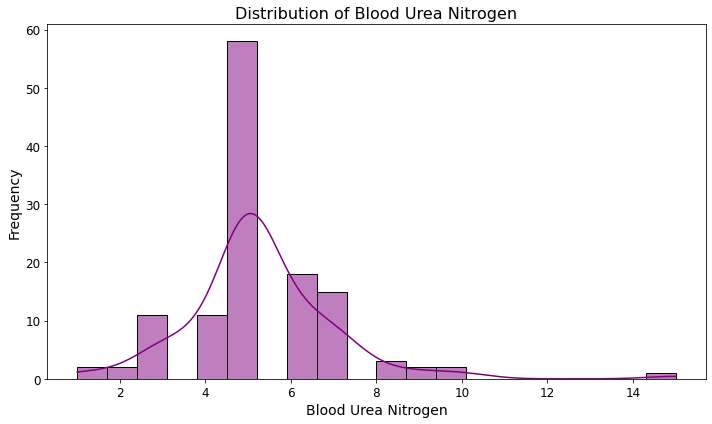

In [120]:
plt.figure(figsize=(10, 6))

# Create a histogram with KDE
sns.histplot(df["Blood Urea Nitrogen"], bins=20, kde=True, color="purple")

plt.xlabel("Blood Urea Nitrogen", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Blood Urea Nitrogen", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Hypoglycemia

In [121]:
df["Hypoglycemia"].unique()

array(['no', 'yes'], dtype=object)

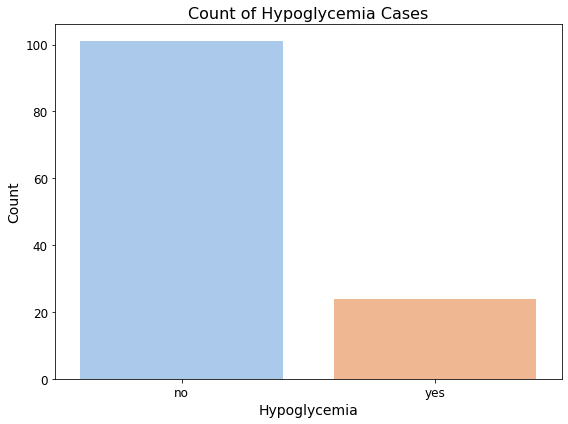

In [122]:
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x=df["Hypoglycemia"], palette="pastel")

plt.xlabel("Hypoglycemia", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Hypoglycemia Cases", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [123]:
df["Hypoglycemia"] = df["Hypoglycemia"].replace({'no': 0, 'yes': 1})

In [124]:
# Completed with Exploratory data analysis and feature engineering

In [125]:
x = df.drop("Type of Diabetes" , axis = 1);
Y = df[["Type of Diabetes"]]

### Model Building without Feature Selection (normal train test split with a ratio of 20%)

In [126]:
from sklearn.model_selection import train_test_split

# Perform the split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.15, random_state=42)

### Naive Bayes

In [127]:
for index, row in x_train.iterrows():
    for column in x_train.columns:
        if isinstance(row[column], str):
            print("Row:", index, "Column:", column, "Value:", row[column])

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(x_train, Y_train)  # ravel() to convert Y to a 1D array

GaussianNB()

0.6415094339622641
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        55
           1       1.00      0.25      0.41        51

    accuracy                           0.64       106
   macro avg       0.80      0.63      0.57       106
weighted avg       0.79      0.64      0.58       106



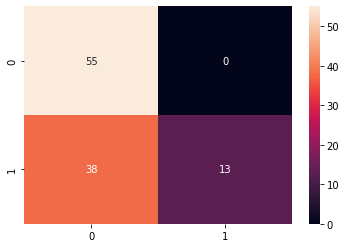

In [129]:
# training data
training_pred = naive_bayes_classifier.predict(x_train)
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.42105263157894735
              precision    recall  f1-score   support

           0       0.38      0.86      0.52         7
           1       0.67      0.17      0.27        12

    accuracy                           0.42        19
   macro avg       0.52      0.51      0.39        19
weighted avg       0.56      0.42      0.36        19



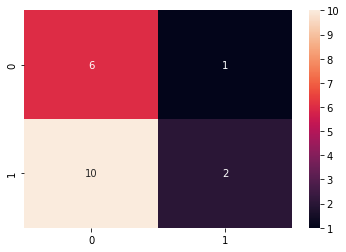

In [130]:
# testing data

testing_pred = naive_bayes_classifier.predict(x_test)
print(accuracy_score(testing_pred,Y_test))
cm = confusion_matrix(testing_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(testing_pred, Y_test))

### KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_classifier.fit(x_train , Y_train)

KNeighborsClassifier(n_neighbors=3)

0.8962264150943396
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       100
           1       0.31      0.67      0.42         6

    accuracy                           0.90       106
   macro avg       0.64      0.79      0.68       106
weighted avg       0.94      0.90      0.91       106



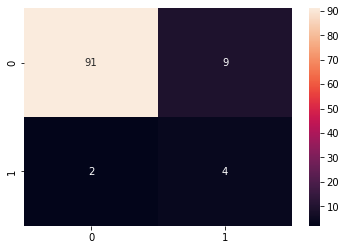

In [132]:
# Training data

training_pred = knn_classifier.predict(x_train)
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.7894736842105263
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.00      0.00      0.00         1

    accuracy                           0.79        19
   macro avg       0.47      0.42      0.44        19
weighted avg       0.89      0.79      0.84        19



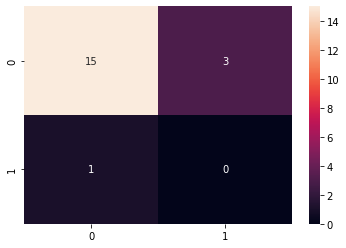

In [133]:
#  Testing Data

test_pred = knn_classifier.predict(x_test)
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression(
    C=1.029387755102041,         # Regularization parameter
    class_weight='balanced',     # Weights associated with classes (None or 'balanced')
    fit_intercept=False,         # Whether to calculate the intercept for this model
    max_iter=52,                 # Maximum number of iterations for optimization solver
    multi_class='multinomial',   # Multinomial logistic regression (used for multi-class classification)
    solver='newton-cg',          # Solver to use for optimization
    tol=0.0008900000000000001     # Tolerance for stopping criteria
)

# Fit the model on the training data
LR.fit(x_train , Y_train)

LogisticRegression(C=1.029387755102041, class_weight='balanced',
                   fit_intercept=False, max_iter=52, multi_class='multinomial',
                   solver='newton-cg', tol=0.0008900000000000001)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        13

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



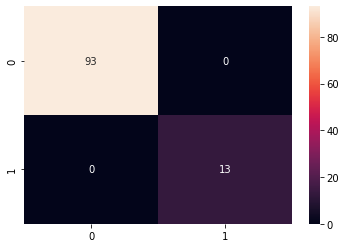

In [135]:
#  training data

training_pred = LR.predict(x_train)
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.8947368421052632
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19



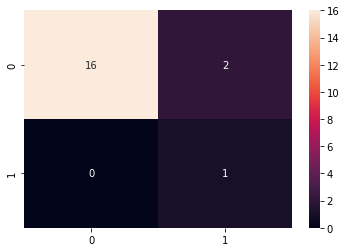

In [136]:
#  testing data

test_pred = LR.predict(x_test)

print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

###  Random Forest Classifier 

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier model
random_forest_model = RandomForestClassifier(
    n_estimators=850,           # Number of trees in the forest
    min_samples_split=2,         # Minimum number of samples required to split an internal node
    min_samples_leaf=8,          # Minimum number of samples required to be at a leaf node
    max_features=0.3,            # Number of features to consider when looking for the best split
    max_depth=35,                # Maximum depth of the tree
    criterion='entropy',         # Criterion to measure the quality of a split
    bootstrap=True               # Whether bootstrap samples are used when building trees
)

# Fit the model on the training data
random_forest_model.fit(x_train , Y_train)


RandomForestClassifier(criterion='entropy', max_depth=35, max_features=0.3,
                       min_samples_leaf=8, n_estimators=850)

0.8867924528301887
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       105
           1       0.08      1.00      0.14         1

    accuracy                           0.89       106
   macro avg       0.54      0.94      0.54       106
weighted avg       0.99      0.89      0.93       106



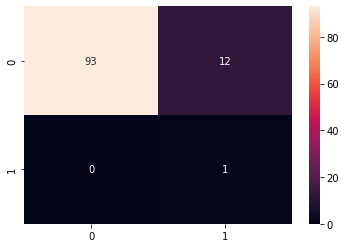

In [138]:
# Training data
training_pred = random_forest_model.predict(x_train)
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.8421052631578947
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.00      0.00      0.00         0

    accuracy                           0.84        19
   macro avg       0.50      0.42      0.46        19
weighted avg       1.00      0.84      0.91        19



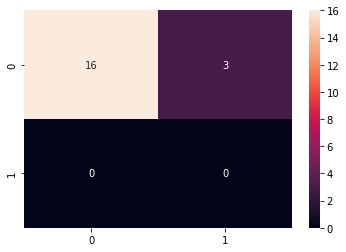

In [139]:
# Testing Data

test_pred = random_forest_model.predict(x_test)
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### ANN

In [140]:
x.shape

(125, 217)

In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_ann_model(params):
    # Extract parameters
    num_layers = params['num_layers']
    learning_rate = params['learning_rate']
    dropout_rate = params['dropout_rate']
    activation = params['activation']
    dense_units = params['dense_units']
    dense_activation = params['dense_activation']
    l2_regularization = params['l2_regularization'] 
    # Initialize the model
    model = Sequential()
    
    # Add the input layer
    model.add(Dense(params['units_0'], activation=activation, input_dim=217))
    model.add(Dropout(dropout_rate))
    
    # Add hidden layers
    for i in range(1, num_layers):
        units = params[f'units_{i}']
        model.add(Dense(units, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(l2_regularization)))
        model.add(Dropout(dropout_rate))
    
    # Add the output layer
    model.add(Dense(1, activation=dense_activation))
    
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Create the model using the provided parameters
params = {
    'num_layers': 7,
    'units_0': 96,
    'units_1': 128,
    'learning_rate': 0.01,
    'dropout_rate': 0.1,
    'activation': 'relu',
    'dense_units': 256,
    'dense_activation': 'sigmoid',
    'l2_regularization': 0.022425749960926646,
    'units_2': 128,
    'units_3': 64,
    'units_4': 176,
    'units_5': 32,
    'units_6': 64,
    'units_7': 128
}
ann = create_ann_model(params)

In [142]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                20928     
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               12416     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [143]:
x_train = x_train.astype(np.int32)
Y_train = Y_train.astype(np.int32)
x_test = x_test.astype(np.int32)
Y_test = Y_test.astype(np.int32)

ann.fit(x_train, Y_train, epochs=50, batch_size = 10, validation_data=(x_test, Y_test))

Epoch 1/50
11/11 [==============================] - 2s 42ms/step - loss: 10.8484 - accuracy: 0.8208 - val_loss: 5.9332 - val_accuracy: 0.8421
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 5.4437 - accuracy: 0.8679 - val_loss: 4.8727 - val_accuracy: 0.8421
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 4.4700 - accuracy: 0.8774 - val_loss: 4.0098 - val_accuracy: 0.8421
Epoch 4/50
11/11 [==============================] - 0s 10ms/step - loss: 3.6631 - accuracy: 0.8774 - val_loss: 3.2918 - val_accuracy: 0.8421
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 2.9782 - accuracy: 0.8774 - val_loss: 2.7624 - val_accuracy: 0.8421
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 2.5102 - accuracy: 0.8774 - val_loss: 2.3598 - val_accuracy: 0.8421
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 2.1168 - accuracy: 0.8774 - val_loss: 2.1166 - val_accuracy: 0.8421
Epoch 8/50
11/1

### Feature Selection using Particle Swarm Optimization

In [144]:
!pip install niapy

In [145]:
import numpy as np
from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import ParticleSwarmOptimization
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

class FeatureSelection(Problem):
    def __init__(self, x_train, Y_train, model, alpha=0.99):
        super().__init__(dimension=x_train.shape[1], lower=0, upper=1)
        self.x_train = x_train
        self.Y_train = Y_train
        self.model = model
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        
        if num_selected == 0:
            print("All features deselected.")
            return 1.0
        
        print(f"Selected {num_selected} features out of {self.x_train.shape[1]}.")
        
        # Customization to make it run in my pipeline.
        selected_columns = []
        
        columns = self.x_train.columns
        index = 0;
        
        while(index < len(columns)):
            if selected[index] == True:
                selected_columns.append(columns[index])  # Use append() here
            index += 1
        
        print(selected_columns)
        
        # Done with the customization
        accuracy = cross_val_score(self.model, self.x_train[selected_columns], self.Y_train, cv=2, n_jobs=-1).mean()
        score = 1 - accuracy
        
        print(f"Accuracy: {accuracy}, Score: {score}")
        
        return self.alpha * score + (1 - self.alpha) * (num_selected / self.x_train.shape[1])

### SVM

In [146]:
problem = FeatureSelection(x_train , Y_train, SVC())
task = Task(problem , SVC(),max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)

Selected 106 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'patent', 'fenofibrate', 'biloba', 'keto', 'rabeprazole', 'febuxostat', 'acid', 'medoxomil', 'calcium', 'labetalol', 'bisoprolol', 'butyricum', 'Shutong', 'calcitriol', 'Qianlie', 'quetiapine', 'isosorbide', 'olmesartan', 'capsule', 'allisartan', 'rosuvastatin', 'rivaroxaban', 'atorvastatin', 'carbonate', 'phosphatidylcholine', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'benidipine', 'irbesartan', 'B1', 'hydrochlorothiazide', 'Ginkgo', 'for', 'dobesilate', '40R', 'Humulin', 'insulin', 'acarbose', 'pioglitazone', 'detemir', 'metformin', '70', 'canagliflozin', 'aspart', 'R', '50', 'systemic', 'D', 'gastritis', 'tract', 'hypoparathyroidism', 'atrial', 'B', 'herniated', 'disc', 'hysteromyoma', 'kidney', 'anxiety', 's', 'spine', 'hepatic', 'periodontitis', 'lung', 'fatty', 'gastric', 'cholelithiasis', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'lesion'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 95 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'glycyrrhizinate', 'rabeprazole', 'febuxostat', 'medoxomil', 'labetalol', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'nifedipine', 'Shen', 'Qianlie', 'isosorbide', 'multivitamin', 'olmesartan', 'ezetimibe', 'chloride', 'renal', 'rosuvastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'valsartan', 'and', 'polyene', 'Ginkgo', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'Humulin', 'repaglinide', 'insulin', '30R', 'acarbose', 'voglibose', 'pioglitazone', 'detemir', 'sitagliptin', '70', 'liraglutide', 'dapagliflozin', 'Gansulin', 'gliclazide', 'systemic', 'D', 'fibrillation', 'atrial', 'pulmonary', 'bridging', 'herniated', 'cataract', 'kidney', 'hepatitis', 'anxiety', 'osteopenia', 'nephrolithiasis', 'periodontitis', 'gallblad

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 92 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'rabeprazole', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'chloride', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'Humulin', 'insulin', '30R', 'glulisine', 'voglibose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'Gansulin', 'gliclazide', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'leucopenia', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastri

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 100 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'rabeprazole', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'drug', 'Shen', 'Qianlie', 'isosorbide', 'multivitamin', 'olmesartan', 'capsule', 'ezetimibe', 'chloride', 'renal', 'pravastatin', 'rosuvastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'Humulin', 'repaglinide', 'insulin', '30R', 'glulisine', 'sitagliptin', '70', 'liraglutide', 'Gansulin', '50', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodon

Accuracy: 0.8679245283018868, Score: 0.13207547169811318
Selected 93 features out of 217.
['trimetazidine', 'extract', 'clopidogrel', 'betahistine', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'febuxostat', 'acid', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'clostridium', 'nifedipine', 'Shen', 'isosorbide', 'capsule', 'ezetimibe', 'allisartan', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'D3', 'mononitrate', '40R', 'Novolin', 'repaglinide', 'insulin', '30R', 'degludec', 'gliquidone', 'glulisine', 'detemir', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'gliclazide', 'D', 'hypoparathyroidism', 'atrial', 'pulmonary', 'bridging', 'leucopenia', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'hypoleukocytemia', 'colo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 86 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'betahistine', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'gliquidone', 'glulisine', 'voglibose', 'sitagliptin', '70', 'glarigine', '50R', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'hypoleukocytemia', 'colorectal', 'myocardial', 'hydronephrosis', '

Accuracy: 0.8679245283018868, Score: 0.13207547169811318
Selected 87 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'betahistine', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'gliquidone', 'glulisine', 'voglibose', 'detemir', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'hypoleukocytemia

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 88 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'betahistine', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'gliquidone', 'glulisine', 'voglibose', 'detemir', 'sitagliptin', '70', 'glarigine', 'dapagliflozin', 'gliclazide', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'Parkinson', 'osteopenia', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'chronic', '

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 87 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'betahistine', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'gliquidone', 'glulisine', 'voglibose', 'detemir', 'sitagliptin', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'Parkinson', 'osteopenia', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'hypoleukocytemia', 'colorectal', 'myocardial', 'h

Accuracy: 0.8679245283018868, Score: 0.13207547169811318
Selected 86 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'glycyrrhizinate', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'carbonate', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'leucopenia', 'B', 'herniated', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'hypoleukocytemia', 'colorectal', 'myocardial', 'hydrone

Accuracy: 0.8679245283018868, Score: 0.13207547169811318
Selected 80 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'acarbose', 'glulisine', 'voglibose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'cor

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 78 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', 'detemir', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'W

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'allisartan', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'dapagliflozin', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabet

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration o

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fasting Insulin', 'Low-Density Lipoprotein C

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Dia

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'F

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'acarbose', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Du

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'tumor', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'acarbose', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Dia

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'tumor', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 78 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'acarbose', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fas

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'metoprolol', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration o

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'clopidogrel', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Du

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cancer', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration o

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Di

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pe

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fa

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'hysteromyoma', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fa

['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'cerebrovascular', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fasting Insulin', 'Low-Density Lipoprotein Cholesterol', 'Estimat

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'D3', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Du

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'degludec', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-pepti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasti

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'glimepiride', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'polyp', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Durat

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['trimetazidine', 'Ning', 'extract', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'bisoprolol', 'magnesium', 'candesartan', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'Shen', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'pravastatin', 'kininogenase', 'rosuvastatinqn', 'levofloxacin', 'and', 'Shuai', 'leaves', 'dobesilate', 'mononitrate', '40R', 'Novolin', 'insulin', '30R', 'glulisine', 'voglibose', '70', 'glarigine', 'gliclazide', 'D', 'hypoparathyroidism', 'pulmonary', 'bridging', 'leucopenia', 'B', 'cataract', 'anxiety', 'sinus', 'osteopenia', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'gland', 'gastric', 'colorectal', 'myocardial', 'hydronephrosis', 'arrhythmia', 'parotid', 'retinopathy', 'cerebrovascular disease', 'coronary heart disease', 'Age', 'Weight', 'BMI', 'Duration of Diabetes', 'Fasting C-peptide', 'Fastin

In [147]:
feature_names = x_train.columns
selected_features = best_features > 0.5
print("Number of selected features:" , selected_features.sum())
print("Selected features: \n \n" , ', '.join(feature_names[selected_features].tolist()))
print()
print()
model_selected = SVC()
model_all = SVC()

model_selected.fit(x_train[feature_names[selected_features].tolist()] , Y_train)
print("Subset accuracy: " , model_selected.score(x_test[feature_names[selected_features].tolist()] , Y_test))

model_all.fit(x_train , Y_train)
print("All Features accuracy: " , model_all.score(x_test , Y_test))

Number of selected features: 73
Selected features: 
 
 trimetazidine, Ning, extract, fenofibrate, keto, doxazosin, epalrestat, bisoprolol, magnesium, candesartan, butyricum, calcitriol, telmisartan, nifedipine, Shen, isosorbide, multivitamin, capsule, ezetimibe, renal, pravastatin, kininogenase, rosuvastatinqn, levofloxacin, and, Shuai, leaves, dobesilate, mononitrate, 40R, Novolin, insulin, 30R, glulisine, voglibose, 70, glarigine, gliclazide, D, hypoparathyroidism, pulmonary, bridging, leucopenia, B, cataract, anxiety, sinus, osteopenia, nephrolithiasis, hepatic, cholecystitis, periodontitis, lung, gallbladder, gland, gastric, colorectal, myocardial, hydronephrosis, arrhythmia, parotid, retinopathy, cerebrovascular disease, coronary heart disease, Age, Weight, BMI, Duration of Diabetes, Fasting C-peptide, Fasting Insulin, Low-Density Lipoprotein Cholesterol, Estimated Glomerular Filtration Rate, Hypoglycemia


Subset accuracy:  0.7894736842105263
All Features accuracy:  0.84210526315

0.8867924528301887
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       103
           1       0.15      0.67      0.25         3

    accuracy                           0.89       106
   macro avg       0.57      0.78      0.59       106
weighted avg       0.97      0.89      0.92       106



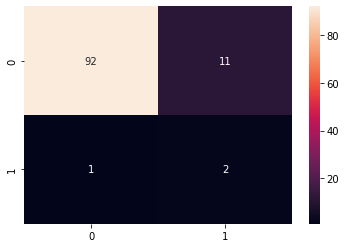

In [148]:
# Training data

training_pred = model_selected.predict(x_train[feature_names[selected_features]])
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.7894736842105263
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.00      0.00      0.00         1

    accuracy                           0.79        19
   macro avg       0.47      0.42      0.44        19
weighted avg       0.89      0.79      0.84        19



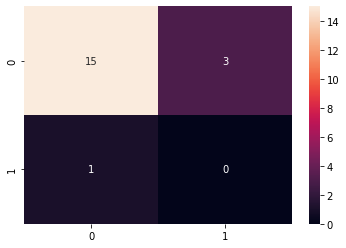

In [150]:
# Testing Data

test_pred = model_selected.predict(x_test[feature_names[selected_features]])
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### Naive Bayes

In [151]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create an instance of the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

In [152]:
problem = FeatureSelection(x_train , Y_train, GaussianNB())
task = Task(problem , GaussianNB(),max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)

Selected 106 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'patent', 'fenofibrate', 'biloba', 'keto', 'rabeprazole', 'febuxostat', 'acid', 'medoxomil', 'calcium', 'labetalol', 'bisoprolol', 'butyricum', 'Shutong', 'calcitriol', 'Qianlie', 'quetiapine', 'isosorbide', 'olmesartan', 'capsule', 'allisartan', 'rosuvastatin', 'rivaroxaban', 'atorvastatin', 'carbonate', 'phosphatidylcholine', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'benidipine', 'irbesartan', 'B1', 'hydrochlorothiazide', 'Ginkgo', 'for', 'dobesilate', '40R', 'Humulin', 'insulin', 'acarbose', 'pioglitazone', 'detemir', 'metformin', '70', 'canagliflozin', 'aspart', 'R', '50', 'systemic', 'D', 'gastritis', 'tract', 'hypoparathyroidism', 'atrial', 'B', 'herniated', 'disc', 'hysteromyoma', 'kidney', 'anxiety', 's', 'spine', 'hepatic', 'periodontitis', 'lung', 'fatty', 'gastric', 'cholelithiasis', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'lesion'

Accuracy: 0.4716981132075472, Score: 0.5283018867924528
Selected 109 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'leucogen', 'betahistine', 'felodipine', 'fenofibrate', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'acid', 'Chinese', 'calcium', 'labetalol', 'Shutong', 'α', 'clostridium', 'nifedipine', 'drug', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'capsule', 'renal', 'bisacodyl', 'rosuvastatin', 'atorvastatin', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'levofloxacin', 'losartan', 'sodium', 'polyene', 'hydrochlorothiazide', 'Ginkgo', 'for', 'D3', 'potassium', '40R', '30', 'Novolin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'aspart', 'liraglutide', 'R', '50R', '50', 'systemic', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'disc', 'thyroid', 'kidney', 'hepatitis', 'anxiety', '

Accuracy: 0.5283018867924528, Score: 0.4716981132075472
Selected 116 features out of 217.
['levothyroxine', 'Yinxingye', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'betahistine', 'felodipine', 'fenofibrate', 'biloba', 'epalrestat', 'Chinese', 'calcium', 'bisoprolol', 'magnesium', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'olmesartan', 'ezetimibe', 'allisartan', 'renal', 'rosuvastatin', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'rosuvastatinqn', 'compound', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'D3', 'mononitrate', '40R', '30', 'glargine', '30R', 'acarbose', 'gliquidone', 'glulisine', 'pioglitazone', 'sitagliptin', 'aspart', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'conjunctivitis', 'disc', 'hepatitis', 'anxiety', 'sinus', 'Park

Accuracy: 0.5188679245283019, Score: 0.4811320754716981
Selected 119 features out of 217.
['levothyroxine', 'Yinxingye', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'biloba', 'doxazosin', 'epalrestat', 'febuxostat', 'medoxomil', 'calcium', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'calcitriol', 'telmisartan', 'clostridium', 'nifedipine', 'beiprostaglandin', 'multivitamin', 'olmesartan', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'compound', 'of', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'B1', 'D3', 'mononitrate', '40R', '30', 'Humulin', 'insulin', 'glargine', '30R', 'degludec', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'aspart', 'glarigine', 'liraglutide', 'dapagliflozin', 'Gansulin', 'gliclazide', 'tract', 'bridging', 'carcinoma', 'hypokalemia', 'conjunctivitis', 'B', 'herniated', 'disc', 'hepatitis', 'anxiety', 'sinus', 

Accuracy: 0.5471698113207547, Score: 0.4528301886792453
Selected 108 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'biloba', 'doxazosin', 'febuxostat', 'medoxomil', 'calcium', 'bisoprolol', 'magnesium', 'diammonium', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'benidipine', 'levofloxacin', 'losartan', 'sodium', 'amlodipine', 'and', 'B1', 'dobesilate', 'D3', 'mononitrate', '40R', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'detemir', 'metformin', 'aspart', 'glarigine', 'liraglutide', 'dapagliflozin', '50', 'gliclazide', 'gastritis', 'tract', 'bridging', 'hypokalemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'hepatitis', 'anxiety', 'sinus', 'Parkinson', 's', 'nephrolithiasis', 'hepatic', 'cholecystitis', 'per

Accuracy: 0.5660377358490566, Score: 0.4339622641509434
Selected 108 features out of 217.
['levothyroxine', 'trimetazidine', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'calcium', 'bisoprolol', 'diammonium', 'candesartan', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'Qianlie', 'multivitamin', 'capsule', 'allisartan', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'compound', 'of', 'benidipine', 'levofloxacin', 'losartan', 'sodium', 'amlodipine', 'and', 'B1', 'dobesilate', 'D3', 'mononitrate', '40R', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'aspart', 'glarigine', 'liraglutide', 'R', '50R', '50', 'gliclazide', 'D', 'gastritis', 'tract', 'pulmonary', 'bridging', 'hypokalemia', 'conjunctivitis', 'B', 'herniated', 'hepatitis', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'hepatic', 'periodontitis', 'lung', 'gallbladder', 'liver', 'atrophi

Accuracy: 0.5094339622641509, Score: 0.49056603773584906
Selected 106 features out of 217.
['trimetazidine', 'Yinxingye', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'febuxostat', 'calcium', 'bisoprolol', 'magnesium', 'diammonium', 'candesartan', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'B1', 'Ginkgo', 'for', 'leaves', 'D3', 'mononitrate', '40R', '30', 'Humulin', 'glargine', '30R', 'gliquidone', 'glulisine', 'detemir', 'metformin', 'sitagliptin', '70', 'canagliflozin', 'glarigine', 'liraglutide', 'R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'herniated', 'anxiety', 'Parkinson', 's', 'spine', 'adrenal', 'hepatic', 'cholecystitis', 'periodontitis', 'ga

Accuracy: 0.5566037735849056, Score: 0.44339622641509435
Selected 114 features out of 217.
['Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'febuxostat', 'calcium', 'bisoprolol', 'magnesium', 'diammonium', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'ezetimibe', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'D3', 'mononitrate', '40R', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'voglibose', 'pioglitazone', 'detemir', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'hysteromyoma', 'anxiety', 'sinus', 'Parkinson', 'os

Accuracy: 0.5377358490566038, Score: 0.46226415094339623
Selected 115 features out of 217.
['trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'medoxomil', 'calcium', 'bisoprolol', 'magnesium', 'candesartan', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'hydrochlorothiazide', 'D3', 'mononitrate', '40R', '30', 'insulin', 'glargine', '30R', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'hysteromyoma', 'kidney', '

['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'biloba', 'keto', 'doxazosin', 'febuxostat', 'labetalol', 'bisoprolol', 'candesartan', 'benazepril', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'ezetimibe', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'irbesartan', 'and', 'metoprolol', 'polyene', 'B1', 'leaves', 'D3', 'mononitrate', '40R', '30', 'insulin', 'glargine', '30R', 'degludec', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'hypocalcemia', 'conjunctivitis', 'B', 'hyperuricemia', 'disc', 'hysteromyoma', 'cataract', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'nephrolithiasis', 'adrenal', 'hepatic', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypole

Accuracy: 0.5566037735849056, Score: 0.44339622641509435
Selected 114 features out of 217.
['Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'doxazosin', 'epalrestat', 'medoxomil', 'calcium', 'bisoprolol', 'candesartan', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'ezetimibe', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'B1', 'hydrochlorothiazide', 'D3', 'mononitrate', '40R', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'detemir', 'metformin', 'aspart', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'hyperuricemia', 'hysteromyoma', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's

Accuracy: 0.5377358490566038, Score: 0.46226415094339623
Selected 114 features out of 217.
['Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'Chinese', 'calcium', 'bisoprolol', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'allisartan', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'irbesartan', 'and', 'metoprolol', 'B1', 'Ginkgo', 'for', 'leaves', 'dobesilate', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', '70', 'aspart', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'hyperuricemia', 'herniated', 'anxiety', 'sinus', 'Parkinson', 's', 'spine',

Accuracy: 0.5471698113207547, Score: 0.4528301886792453
Selected 116 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'magnesium', 'candesartan', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'irbesartan', 'and', 'Shuai', 'metoprolol', 'B1', 'Ginkgo', 'D3', 'mononitrate', '40R', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'bridging', 'carcinoma', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'hysteromyoma', 'kidney', 'anxiety', 'sinus', 'P

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 113 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'doxazosin', 'calcium', 'bisoprolol', 'magnesium', 'candesartan', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'irbesartan', 'and', 'metoprolol', 'B1', 'Ginkgo', 'for', 'D3', 'mononitrate', '40R', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'detemir', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'hyperuricemia', 'hysteromyoma', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 101 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'bridging', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'scleros

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 102 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'febuxostat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocyte

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 102 features out of 217.
['Ning', 'tablet', 'extract', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'febuxostat', 'calcium', 'bisoprolol', 'magnesium', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 100 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sc

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 102 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukoc

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 99 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'cholecystitis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'lumbar', 'enlarged

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 97 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'lumb

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 97 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'lumb

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 101 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytem

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 97 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 97 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosi

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 97 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemi

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypot

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer', 'tumor', 'cyst', 'breast', 'bradycardia', 'arrhythmia', 'cerebrova

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlar

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarg

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer', 'tumor', 'cyst',

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclero

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'kidney', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarg

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypoth

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer', 'tumor', 'cyst', 

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enl

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothy

Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'degludec', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer', 

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 96 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'en

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 95 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hyp

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'valsartan', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer', 'tumor', 'cyst', 'breast', 'bradycardia', 'arrhythmia', 'retinopathy', 'nephropathy', 'c

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'A

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'p

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 94 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'multivitamin', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism',

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', '

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 92 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 93 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'doxazosin', 'epalrestat', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

Accuracy: 0.5754716981132075, Score: 0.42452830188679247
Selected 91 features out of 217.
['Ning', 'tablet', 'clopidogrel', 'leucogen', 'fenofibrate', 'keto', 'calcium', 'bisoprolol', 'butyricum', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'capsule', 'atorvastatin', 'carbonate', 'kininogenase', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'mecobalamin', 'benidipine', 'levofloxacin', 'losartan', 'amlodipine', 'and', 'metoprolol', 'B1', 'Ginkgo', 'leaves', 'D3', 'mononitrate', '30', 'insulin', 'glargine', '30R', 'acarbose', 'glulisine', 'pioglitazone', 'metformin', 'sitagliptin', 'glarigine', 'liraglutide', 'R', 'glimepiride', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypocalcemia', 'leucopenia', 'B', 'hyperuricemia', 'anxiety', 'sinus', 'Parkinson', 's', 'spine', 'nephrolithiasis', 'periodontitis', 'lung', 'gallbladder', 'fatty', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hypothyroidism', 'psoriasis', 'Alzheimer'

In [153]:
feature_names = x_train.columns
selected_features = best_features > 0.5
print("Number of selected features:" , selected_features.sum())
print("Selected features: \n \n" , ', '.join(feature_names[selected_features].tolist()))
print()
print()
model_selected = GaussianNB()
model_all = GaussianNB()

model_selected.fit(x_train[feature_names[selected_features].tolist()] , Y_train)
print("Subset accuracy: " , model_selected.score(x_test[feature_names[selected_features].tolist()] , Y_test))

model_all.fit(x_train , Y_train)
print("All Features accuracy: " , model_all.score(x_test , Y_test))

Number of selected features: 91
Selected features: 
 
 Ning, tablet, clopidogrel, leucogen, fenofibrate, keto, calcium, bisoprolol, butyricum, calcitriol, telmisartan, nifedipine, beiprostaglandin, Qianlie, capsule, atorvastatin, carbonate, kininogenase, phosphatidylcholine, Zhenju, isoglycyrrhizinate, mecobalamin, benidipine, levofloxacin, losartan, amlodipine, and, metoprolol, B1, Ginkgo, leaves, D3, mononitrate, 30, insulin, glargine, 30R, acarbose, glulisine, pioglitazone, metformin, sitagliptin, glarigine, liraglutide, R, glimepiride, 50R, gliclazide, gastritis, fibrillation, tract, carcinoma, hypocalcemia, leucopenia, B, hyperuricemia, anxiety, sinus, Parkinson, s, spine, nephrolithiasis, periodontitis, lung, gallbladder, fatty, hypoleukocytemia, sclerosis, enlarged, hypothyroidism, psoriasis, Alzheimer, tumor, cyst, breast, bradycardia, arrhythmia, retinopathy, nephropathy, cerebrovascular disease, coronary heart disease, Age, Weight, Smoking History, Alcohol Drinking History, F

0.5754716981132075
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        48
           1       1.00      0.22      0.37        58

    accuracy                           0.58       106
   macro avg       0.76      0.61      0.52       106
weighted avg       0.78      0.58      0.51       106



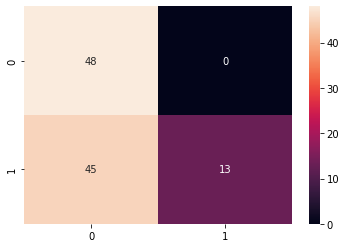

In [154]:
# Training data

training_pred = model_selected.predict(x_train[feature_names[selected_features]])
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.3157894736842105
              precision    recall  f1-score   support

           0       0.25      0.80      0.38         5
           1       0.67      0.14      0.24        14

    accuracy                           0.32        19
   macro avg       0.46      0.47      0.31        19
weighted avg       0.56      0.32      0.27        19



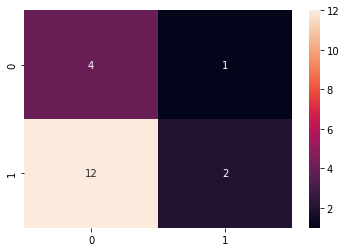

In [155]:
# Testing Data

test_pred = model_selected.predict(x_test[feature_names[selected_features]])
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

problem = FeatureSelection(x_train , Y_train, KNeighborsClassifier(n_neighbors = 3))
task = Task(problem , KNeighborsClassifier(n_neighbors = 3),max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)

Selected 106 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'patent', 'fenofibrate', 'biloba', 'keto', 'rabeprazole', 'febuxostat', 'acid', 'medoxomil', 'calcium', 'labetalol', 'bisoprolol', 'butyricum', 'Shutong', 'calcitriol', 'Qianlie', 'quetiapine', 'isosorbide', 'olmesartan', 'capsule', 'allisartan', 'rosuvastatin', 'rivaroxaban', 'atorvastatin', 'carbonate', 'phosphatidylcholine', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'benidipine', 'irbesartan', 'B1', 'hydrochlorothiazide', 'Ginkgo', 'for', 'dobesilate', '40R', 'Humulin', 'insulin', 'acarbose', 'pioglitazone', 'detemir', 'metformin', '70', 'canagliflozin', 'aspart', 'R', '50', 'systemic', 'D', 'gastritis', 'tract', 'hypoparathyroidism', 'atrial', 'B', 'herniated', 'disc', 'hysteromyoma', 'kidney', 'anxiety', 's', 'spine', 'hepatic', 'periodontitis', 'lung', 'fatty', 'gastric', 'cholelithiasis', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'lesion'

Accuracy: 0.8584905660377359, Score: 0.14150943396226412
Selected 109 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'leucogen', 'betahistine', 'felodipine', 'fenofibrate', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'acid', 'Chinese', 'calcium', 'labetalol', 'Shutong', 'α', 'clostridium', 'nifedipine', 'drug', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'capsule', 'renal', 'bisacodyl', 'rosuvastatin', 'atorvastatin', 'phosphatidylcholine', 'Zhenju', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'levofloxacin', 'losartan', 'sodium', 'polyene', 'hydrochlorothiazide', 'Ginkgo', 'for', 'D3', 'potassium', '40R', '30', 'Novolin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'aspart', 'liraglutide', 'R', '50R', '50', 'systemic', 'D', 'gastritis', 'fibrillation', 'tract', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'B', 'hyperuricemia', 'disc', 'thyroid', 'kidney', 'hepatitis', 'anxiety', 

Accuracy: 0.8584905660377359, Score: 0.14150943396226412
Selected 101 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'extract', 'patent', 'felodipine', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'Chinese', 'labetalol', 'diammonium', 'benazepril', 'Shutong', 'calcitriol', 'α', 'nifedipine', 'drug', 'Qianlie', 'isosorbide', 'multivitamin', 'olmesartan', 'renal', 'kininogenase', 'isoglycyrrhizinate', 'rosuvastatinqn', 'valsartan', 'amlodipine', 'irbesartan', 'and', 'metoprolol', 'Ginkgo', 'leaves', 'dobesilate', '40R', 'Novolin', 'Humulin', 'glargine', 'acarbose', 'gliquidone', 'voglibose', 'detemir', '70', 'glarigine', 'liraglutide', 'R', 'glimepiride', 'Gansulin', '50', 'systemic', 'D', 'fibrillation', 'tract', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypocalcemia', 'conjunctivitis', 'herniated', 'cataract', 'kidney', 'hepatitis', 'spine', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'liver', 'hypoleukocytemia', 'co

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 109 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'felodipine', 'keto', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'Chinese', 'labetalol', 'benazepril', 'butyricum', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'ezetimibe', 'renal', 'rosuvastatin', 'kininogenase', 'compound', 'amlodipine', 'irbesartan', 'metoprolol', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'voglibose', 'detemir', '70', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'systemic', 'D', 'gastritis', 'fibrillation', 'tract', 'hypoparathyroidism', 'atrial', 'pulmonary', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'spine', 'nephrol

Selected 108 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'extract', 'betahistine', 'keto', 'glycyrrhizinate', 'epalrestat', 'febuxostat', 'acid', 'Chinese', 'labetalol', 'magnesium', 'diammonium', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'olmesartan', 'ezetimibe', 'allisartan', 'renal', 'pravastatin', 'rosuvastatin', 'carbonate', 'kininogenase', 'raberazole', 'isoglycyrrhizinate', 'amlodipine', 'irbesartan', 'metoprolol', 'leaves', 'dobesilate', '40R', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'degludec', 'acarbose', 'voglibose', 'detemir', '70', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', 'glimepiride', '50R', 'gliclazide', 'D', 'fibrillation', 'atrial', 'pulmonary', 'hypocalcemia', 'conjunctivitis', 'herniated', 'thyroid', 'cataract', 'hepatitis', 'spine', 'nephrolithiasis', 'adrenal', 'urinary', 'nodule', 'periodont

Accuracy: 0.8490566037735849, Score: 0.15094339622641506
Selected 114 features out of 217.
['Ning', 'tablet', 'patent', 'betahistine', 'keto', 'glycyrrhizinate', 'epalrestat', 'febuxostat', 'Chinese', 'labetalol', 'magnesium', 'benazepril', 'telmisartan', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'capsule', 'renal', 'pravastatin', 'rosuvastatin', 'atorvastatin', 'carbonate', 'kininogenase', 'raberazole', 'isoglycyrrhizinate', 'compound', 'of', 'valsartan', 'benidipine', 'sodium', 'amlodipine', 'Shuai', 'metoprolol', 'Ginkgo', 'leaves', '30', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'pioglitazone', '70', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'systemic', 'D', 'gastritis', 'fibrillation', 'tract', 'atrial', 'bridging', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'sinus', 'spine', 'nephrolithiasis', 'adrenal', 'urinary', 'hepatic', 'cholecys

Accuracy: 0.8113207547169812, Score: 0.18867924528301883
Selected 104 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'keto', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'Chinese', 'labetalol', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'renal', 'pravastatin', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'compound', 'Jiangya', 'amlodipine', 'irbesartan', 'polyene', 'leaves', 'dobesilate', '40R', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'degludec', 'acarbose', 'detemir', '70', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'tract', 'atrial', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'spine', 'nephrolithiasis', 'urinary', 'nodule', 'periodontitis', 'gastric', 'liver', 'chol

Accuracy: 0.8679245283018868, Score: 0.13207547169811318
Selected 99 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'keto', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'febuxostat', 'Chinese', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'compound', 'irbesartan', 'metoprolol', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'degludec', 'acarbose', 'detemir', '70', 'canagliflozin', 'liraglutide', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'systemic', 'D', 'gastritis', 'fibrillation', 'tract', 'atrial', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'kidney', 'hepatitis', 'osteopenia', 's', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gastric', 'liver', 'hypoleuk

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 100 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'Chinese', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'compound', 'valsartan', 'sodium', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'potassium', '40R', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'D', 'gastritis', 'tract', 'atrial', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'urinary', 'nodule', 'periodontitis', 'gastric', 'liver', 'hypoleukocytemia', 'enlarged', 

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 96 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'labetalol', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'ezetimibe', 'renal', 'pravastatin', 'bisacodyl', 'rosuvastatin', 'kininogenase', 'Zhenju', 'raberazole', 'compound', 'levofloxacin', 'sodium', 'Jiangya', 'polyene', 'B1', 'leaves', 'dobesilate', 'potassium', 'mononitrate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'pioglitazone', 'detemir', 'glarigine', 'dapagliflozin', '50R', 'Gansulin', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'thyroid', 'kidney', 'adrenal', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'ost

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 94 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'raberazole', 'compound', 'sodium', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'glulisine', 'detemir', 'canagliflozin', 'liraglutide', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'osteopenia', 'nephrolithiasis', 'urinary', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'lumbar', 'enlarged', 'lesion', 'psoriasis', 'hy

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 87 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'Chinese', 'labetalol', 'benazepril', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'beiprostaglandin', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'Jiangya', 'irbesartan', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'degludec', 'acarbose', 'glulisine', 'detemir', 'canagliflozin', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', '

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 84 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'ezetimibe', 'renal', 'rosuvastatin', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'glarigine', 'dapagliflozin', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 102 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'calcium', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'beiprostaglandin', 'Qianlie', 'quetiapine', 'isosorbide', 'renal', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'raberazole', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'D3', '40R', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', '70', 'liraglutide', 'dapagliflozin', 'R', '50R', 'gliclazide', 'systemic', 'D', 'gastritis', 'fibrillation', 'atrial', 'carcinoma', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'osteopenia', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis

Accuracy: 0.8584905660377359, Score: 0.14150943396226412
Selected 95 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'ezetimibe', 'renal', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'mononitrate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'metformin', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'thyroid', 'kidney', 'hepatitis', 'osteopenia', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarge

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 96 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'multivitamin', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'valsartan', 'sodium', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'Gansulin', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'cholelithiasis', 'hypoleukocytemia', 'scler

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 87 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'Gansulin', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia',

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 89 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'Zhenju', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'glulisine', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 86 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'pravastatin', 'rosuvastatin', 'carbonate', 'Zhenju', 'raberazole', 'compound', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'D', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'spine', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer',

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 86 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'Chinese', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'glulisine', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'Gansulin', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'disc', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neur

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 88 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'Zhenju', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'metformin', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'disease', 'cyst', 'arrhythmia', 'deficie

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 88 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'valsartan', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'metformin', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia',

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 88 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'Qianlie', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'ezetimibe', 'renal', 'rosuvastatin', 'carbonate', 'Zhenju', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 90 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'butyricum', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'Zhenju', 'rosuvastatinqn', 'compound', 'valsartan', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'metformin', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arr

Selected 91 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'kininogenase', 'raberazole', 'rosuvastatinqn', 'compound', 'valsartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'glulisine', 'detemir', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrova

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 88 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'ezetimibe', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'Zhenju', 'raberazole', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'mononitrate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'cholelithiasis', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythm

Accuracy: 0.9150943396226415, Score: 0.08490566037735847
Selected 85 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'rosuvastatin', 'carbonate', 'Zhenju', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebro

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 84 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'raberazole', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'periodontitis', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cereb

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 83 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'D3', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 83 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'bisacodyl', 'rosuvastatin', 'carbonate', 'Zhenju', 'rosuvastatinqn', 'compound', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'mononitrate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cereb

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 82 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'pravastatin', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'amlodipine', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'gastritis', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'enlarged', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart d

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 78 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'pravastatin', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History'

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 80 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'gastritis', 'fibrillation', 'hypoparathyroidism', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', '

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 79 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'pravastatin', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'hyperlipidemia', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Hei

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 80 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'pravastatin', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart diseas

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 79 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', '50', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 77 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'Smoking Hi

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 78 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'gallbladder', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'S

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabet

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 

Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'HbA1c', 'Glycated Albumin', '

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'losartan', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabeti

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fastin

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'felodipine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History',

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Di

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabe

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', '

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Di

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 76 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'canagliflozin', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'coronary heart disease', 'Gender', 'Height', 'Weight', 'Smoking History', '

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fastin

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fastin

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complicati

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complicati

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Compli

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complicati

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'fibrillation', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fastin

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complication

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasti

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasti

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complication

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 75 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'A

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Com

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complicat

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'hydrochlorothiazide', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 74 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complicat

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'nifedipine', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting 

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'cholecystitis', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasti

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 73 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'carbonate', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

Accuracy: 0.9245283018867925, Score: 0.07547169811320753
Selected 72 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'patent', 'betahistine', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'benazepril', 'Shutong', 'telmisartan', 'α', 'drug', 'aspirin', 'quetiapine', 'isosorbide', 'olmesartan', 'renal', 'rosuvastatin', 'rosuvastatinqn', 'compound', 'Jiangya', 'polyene', 'leaves', 'dobesilate', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'detemir', 'glarigine', 'dapagliflozin', 'R', '50R', 'gliclazide', 'gastritis', 'atrial', 'hypocalcemia', 'conjunctivitis', 'thyroid', 'kidney', 'hepatitis', 'nephrolithiasis', 'nodule', 'fatty', 'gastric', 'liver', 'hypoleukocytemia', 'sclerosis', 'hydronephrosis', 'tumor', 'disease', 'cyst', 'arrhythmia', 'deficiency', 'cerebrovascular', 'cancer', 'neuropathy', 'cerebrovascular disease', 'Gender', 'Height', 'Weight', 'Smoking History', 'Alcohol Drinking History', 'Acute Diabetic Complications', 'Fasting C-peptide', 'H

In [157]:
feature_names = x_train.columns
selected_features = best_features > 0.5
print("Number of selected features:" , selected_features.sum())
print("Selected features: \n \n" , ', '.join(feature_names[selected_features].tolist()))
print()
print()
model_selected = KNeighborsClassifier(n_neighbors = 3)
model_all = KNeighborsClassifier(n_neighbors = 3)

model_selected.fit(x_train[feature_names[selected_features].tolist()] , Y_train)
print("Subset accuracy: " , model_selected.score(x_test[feature_names[selected_features].tolist()] , Y_test))

model_all.fit(x_train , Y_train)
print("All Features accuracy: " , model_all.score(x_test , Y_test))

Number of selected features: 72
Selected features: 
 
 levothyroxine, Yinxingye, Ning, patent, betahistine, rabeprazole, epalrestat, febuxostat, labetalol, benazepril, Shutong, telmisartan, α, drug, aspirin, quetiapine, isosorbide, olmesartan, renal, rosuvastatin, rosuvastatinqn, compound, Jiangya, polyene, leaves, dobesilate, Novolin, Humulin, glargine, degludec, acarbose, detemir, glarigine, dapagliflozin, R, 50R, gliclazide, gastritis, atrial, hypocalcemia, conjunctivitis, thyroid, kidney, hepatitis, nephrolithiasis, nodule, fatty, gastric, liver, hypoleukocytemia, sclerosis, hydronephrosis, tumor, disease, cyst, arrhythmia, deficiency, cerebrovascular, cancer, neuropathy, cerebrovascular disease, Gender, Height, Weight, Smoking History, Alcohol Drinking History, Acute Diabetic Complications, Fasting C-peptide, HbA1c, Glycated Albumin, Creatinine, Estimated Glomerular Filtration Rate


Subset accuracy:  0.7368421052631579
All Features accuracy:  0.7894736842105263


0.9433962264150944
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        99
           1       0.54      1.00      0.70         7

    accuracy                           0.94       106
   macro avg       0.77      0.97      0.83       106
weighted avg       0.97      0.94      0.95       106



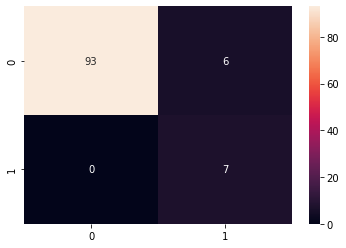

In [158]:
# Training data

training_pred = model_selected.predict(x_train[feature_names[selected_features]])
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

0.7368421052631579
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        17
           1       0.00      0.00      0.00         2

    accuracy                           0.74        19
   macro avg       0.44      0.41      0.42        19
weighted avg       0.78      0.74      0.76        19



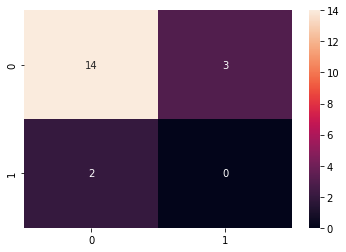

In [159]:
# Testing Data

test_pred = model_selected.predict(x_test[feature_names[selected_features]])
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=850,           # Number of trees in the forest
    min_samples_split=2,         # Minimum number of samples required to split an internal node
    min_samples_leaf=8,          # Minimum number of samples required to be at a leaf node
    max_features=0.3,            # Number of features to consider when looking for the best split
    max_depth=35,                # Maximum depth of the tree
    criterion='entropy',         # Criterion to measure the quality of a split
    bootstrap=True               # Whether bootstrap samples are used when building trees
)

problem = FeatureSelection(x_train , Y_train, random_forest_model)
task = Task(problem , random_forest_model,max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)

Selected 106 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'extract', 'clopidogrel', 'patent', 'fenofibrate', 'biloba', 'keto', 'rabeprazole', 'febuxostat', 'acid', 'medoxomil', 'calcium', 'labetalol', 'bisoprolol', 'butyricum', 'Shutong', 'calcitriol', 'Qianlie', 'quetiapine', 'isosorbide', 'olmesartan', 'capsule', 'allisartan', 'rosuvastatin', 'rivaroxaban', 'atorvastatin', 'carbonate', 'phosphatidylcholine', 'isoglycyrrhizinate', 'rosuvastatinqn', 'compound', 'of', 'valsartan', 'benidipine', 'irbesartan', 'B1', 'hydrochlorothiazide', 'Ginkgo', 'for', 'dobesilate', '40R', 'Humulin', 'insulin', 'acarbose', 'pioglitazone', 'detemir', 'metformin', '70', 'canagliflozin', 'aspart', 'R', '50', 'systemic', 'D', 'gastritis', 'tract', 'hypoparathyroidism', 'atrial', 'B', 'herniated', 'disc', 'hysteromyoma', 'kidney', 'anxiety', 's', 'spine', 'hepatic', 'periodontitis', 'lung', 'fatty', 'gastric', 'cholelithiasis', 'hypoleukocytemia', 'sclerosis', 'atrophic', 'enlarged', 'lesion'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 111 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'extract', 'patent', 'betahistine', 'felodipine', 'keto', 'glycyrrhizinate', 'rabeprazole', 'epalrestat', 'Chinese', 'labetalol', 'magnesium', 'benazepril', 'Shutong', 'calcitriol', 'telmisartan', 'α', 'nifedipine', 'drug', 'Qianlie', 'quetiapine', 'isosorbide', 'multivitamin', 'allisartan', 'renal', 'rosuvastatin', 'atorvastatin', 'kininogenase', 'Zhenju', 'isoglycyrrhizinate', 'compound', 'sodium', 'amlodipine', 'irbesartan', 'Shuai', 'metoprolol', 'polyene', 'for', 'leaves', 'dobesilate', 'potassium', '40R', 'Novolin', 'Humulin', 'glargine', 'degludec', 'acarbose', 'gliquidone', 'detemir', 'canagliflozin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', 'glimepiride', '50R', '50', 'gliclazide', 'systemic', 'D', 'gastritis', 'fibrillation', 'hypocalcemia', 'conjunctivitis', 'B', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'spine', 'nephrolith

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 110 features out of 217.
['levothyroxine', 'Yinxingye', 'Ning', 'tablet', 'extract', 'clopidogrel', 'fenofibrate', 'biloba', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'bisoprolol', 'diammonium', 'benazepril', 'butyricum', 'telmisartan', 'α', 'clostridium', 'nifedipine', 'beiprostaglandin', 'aspirin', 'isosorbide', 'multivitamin', 'olmesartan', 'capsule', 'ezetimibe', 'renal', 'atorvastatin', 'kininogenase', 'phosphatidylcholine', 'isoglycyrrhizinate', 'mecobalamin', 'rosuvastatinqn', 'compound', 'valsartan', 'benidipine', 'B1', 'for', 'leaves', 'dobesilate', 'D3', 'Humulin', 'repaglinide', 'insulin', 'gliquidone', 'glulisine', 'sitagliptin', '70', 'canagliflozin', 'aspart', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', 'Gansulin', 'gliclazide', 'systemic', 'gastritis', 'pulmonary', 'hypokalemia', 'hypocalcemia', 'B', 'hyperuricemia', 'disc', 'thyroid', 'kidney', 'hepatitis', 'Parkin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 100 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'betahistine', 'felodipine', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'calcium', 'labetalol', 'butyricum', 'Shutong', 'telmisartan', 'nifedipine', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'olmesartan', 'capsule', 'ezetimibe', 'renal', 'rosuvastatin', 'kininogenase', 'phosphatidylcholine', 'isoglycyrrhizinate', 'mecobalamin', 'rosuvastatinqn', 'of', 'valsartan', 'Ginkgo', 'for', 'leaves', 'D3', '40R', '30', 'Novolin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'liraglutide', 'R', 'gliclazide', 'D', 'fibrillation', 'tract', 'atrial', 'pulmonary', 'carcinoma', 'hypocalcemia', 'leucopenia', 'conjunctivitis', 'hyperuricemia', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 's', 'spine', 'adrenal', 'nodule', 'gallbladder', 'gastric', 'liver', 'colorectal', 'atrophic', 'my

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 95 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'isosorbide', 'multivitamin', 'olmesartan', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'B1', 'Ginkgo', 'for', 'leaves', 'D3', '40R', 'Novolin', 'Humulin', 'repaglinide', 'acarbose', 'voglibose', 'detemir', 'sitagliptin', '70', 'canagliflozin', 'liraglutide', 'dapagliflozin', 'R', 'Gansulin', 'gliclazide', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'atrial', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'osteopenia', 'spine', 'gallbladder', 'gastric', 'colorectal', 'enlarged', 'hypothyroidism', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 95 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'tablet', 'clopidogrel', 'betahistine', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'labetalol', 'diammonium', 'candesartan', 'benazepril', 'butyricum', 'telmisartan', 'nifedipine', 'drug', 'beiprostaglandin', 'Qianlie', 'aspirin', 'isosorbide', 'multivitamin', 'capsule', 'ezetimibe', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'and', 'polyene', 'for', 'leaves', 'D3', 'mononitrate', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'glulisine', 'voglibose', 'sitagliptin', 'glarigine', 'liraglutide', 'dapagliflozin', 'R', 'Gansulin', 'gliclazide', 'systemic', 'D', 'fibrillation', 'atrial', 'pulmonary', 'carcinoma', 'hypocalcemia', 'conjunctivitis', 'hyperuricemia', 'cataract', 'hepatitis', 'Parkinson', 'nodule', 'gallbladder', 'gastric', 'colorectal', 'lumbar', '

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 91 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'diammonium', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'olmesartan', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'levofloxacin', 'and', 'Ginkgo', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'insulin', 'glargine', 'acarbose', 'glulisine', 'voglibose', 'sitagliptin', '70', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'atrial', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'spine', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'enlarged', 'hypothyroidism', 'Alzheimer', 'hydronephrosis'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 91 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'fenofibrate', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'compound', 'valsartan', 'benidipine', 'and', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'voglibose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'atrial', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'spine', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'atrophic', 'lumbar', 'hypothyroidism', 'Alzheimer', 't

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 87 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'gallbladder', 'fatty', 'gland', 'gastric', 'colorectal', 'atrophic', 'lumbar', 'hypothyroidism', 'Alzheimer', 'osteoporosis', 'disease', 'chronic', 'breast', 'hype

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 85 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'isoglycyrrhizinate', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'metformin', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'anxiety', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'atrophic', 'lumbar', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 87 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'isoglycyrrhizinate', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'atrophic', 'lumbar', 'hypothyroidism', 'Alzheimer', 'hydronephrosis', 'tumor', 'osteoporosis', 'chronic', 'b

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 86 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'thyroid', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'lumbar', 'Alzheimer', 'hydronephrosis', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhyt

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 88 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'sodium', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'glulisine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'atrophic', 'disese', 'hypothyroidism', 'Alzheimer', 'hydronephrosis', 'tumor', 'osteoporosis', 'disease', 'chronic', 'b

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 85 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'atrophic', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 82 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'sodium', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 84 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'sodium', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'hypothyroidism', 'Alzheimer', 'hydronephrosis', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 81 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'compound', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'lumbar', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmi

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 85 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycar

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 81 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'quetiapine', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'gallbladder', 'gastric', 'colorectal', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'He

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 83 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'spine', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'p

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 83 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'sodium', 'polyene', 'B1', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 79 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'B1', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'glulisine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'anxiety', 'Parkinson', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'hypothyroidism', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Sm

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 81 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'conjunctivitis', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'lumbar', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'in

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 81 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'hypothyroidism', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 80 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'B1', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'parotid', 'Age', 'Height', '

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 80 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'parotid', 'Age', 'He

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 85 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'compound', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'bridging', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'anxiety', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'atrophic', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'ar

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'A

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'D

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'parotid', 'Age', 'Height', 'Weight', 'Smoking History'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'Humulin', 'repaglinide', 'glargine', 'acarbose', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'cerebrovascular', 'infection', 'parotid', 'Height', '

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Densit

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Durat

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hist

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-D

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'S

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hist

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histor

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Shen', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'S

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hist

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hi

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Heig

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Sm

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height',

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'S

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'fatty', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smokin

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 76 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'disease', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'cerebrovascular', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'H

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-De

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-D

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histor

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hi

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Histo

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'hysteromyoma', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking 

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 74 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking Hi

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'psoriasis', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking His

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'Duration of Diabetes

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'acid', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Sm

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 75 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'B1', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smok

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 77 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'clostridium', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'benidipine', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'atrophic', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height'

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 73 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'polyene', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Dens

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

Accuracy: 0.8773584905660378, Score: 0.12264150943396224
Selected 72 features out of 217.
['levothyroxine', 'trimetazidine', 'Yinxingye', 'Ning', 'clopidogrel', 'keto', 'rabeprazole', 'epalrestat', 'febuxostat', 'medoxomil', 'labetalol', 'candesartan', 'benazepril', 'butyricum', 'nifedipine', 'beiprostaglandin', 'Qianlie', 'aspirin', 'multivitamin', 'capsule', 'renal', 'kininogenase', 'phosphatidylcholine', 'mecobalamin', 'rosuvastatinqn', 'valsartan', 'for', 'leaves', 'D3', 'Novolin', 'repaglinide', 'glargine', 'sitagliptin', '70', 'glarigine', 'liraglutide', 'R', 'Gansulin', 'systemic', 'D', 'fibrillation', 'hypoparathyroidism', 'pulmonary', 'carcinoma', 'hypokalemia', 'hypocalcemia', 'B', 'herniated', 'cataract', 'kidney', 'hepatitis', 'Parkinson', 'lung', 'gallbladder', 'gastric', 'colorectal', 'Alzheimer', 'tumor', 'osteoporosis', 'chronic', 'breast', 'hyperlipidemia', 'bradycardia', 'arrhythmia', 'infection', 'parotid', 'Height', 'Weight', 'Smoking History', 'High-Density Lipopro

In [ ]:
feature_names = x_train.columns
selected_features = best_features > 0.5
print("Number of selected features:" , selected_features.sum())
print("Selected features: \n \n" , ', '.join(feature_names[selected_features].tolist()))
print()
print()
model_selected = random_forest_model
model_all = random_forest_model

model_selected.fit(x_train[feature_names[selected_features].tolist()] , Y_train)
print("Subset accuracy: " , model_selected.score(x_test[feature_names[selected_features].tolist()] , Y_test))

model_all.fit(x_train , Y_train)
print("All Features accuracy: " , model_all.score(x_test , Y_test))

In [ ]:
# Training data

training_pred = model_selected.predict(x_train[feature_names[selected_features]])
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

In [ ]:
# Testing Data

test_pred = model_selected.predict(x_test[feature_names[selected_features]])
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    C=1.029387755102041,         # Regularization parameter
    class_weight='balanced',     # Weights associated with classes (None or 'balanced')
    fit_intercept=False,         # Whether to calculate the intercept for this model
    max_iter=52,                 # Maximum number of iterations for optimization solver
    multi_class='multinomial',   # Multinomial logistic regression (used for multi-class classification)
    solver='newton-cg',          # Solver to use for optimization
    tol=0.0008900000000000001     # Tolerance for stopping criteria
)

problem = FeatureSelection(x_train , Y_train, log_reg_model)
task = Task(problem , log_reg_model,max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)

In [ ]:
feature_names = x_train.columns
selected_features = best_features > 0.5
print("Number of selected features:" , selected_features.sum())
print("Selected features: \n \n" , ', '.join(feature_names[selected_features].tolist()))
print()
print()
model_selected = log_reg_model
model_all = log_reg_model

model_selected.fit(x_train[feature_names[selected_features].tolist()] , Y_train)
print("Subset accuracy: " , model_selected.score(x_test[feature_names[selected_features].tolist()] , Y_test))

model_all.fit(x_train , Y_train)
print("All Features accuracy: " , model_all.score(x_test , Y_test))

In [ ]:
# Training data

training_pred = model_selected.predict(x_train[feature_names[selected_features]])
print(accuracy_score(training_pred,Y_train))
cm = confusion_matrix(training_pred, Y_train)
sns.heatmap(cm, annot = True)
print(classification_report(training_pred,Y_train))

In [ ]:
# Testing Data

test_pred = model_selected.predict(x_test[feature_names[selected_features]])
print(accuracy_score(test_pred,Y_test))
cm = confusion_matrix(test_pred, Y_test)
sns.heatmap(cm, annot = True)
print(classification_report(test_pred,Y_test))

### Artificial Neural Network

In [ ]:
ann = create_ann_model(params)

In [ ]:
# We might require modifying the FeatureSelection class to make it usable by ANN

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from pyswarms.single.global_best import GlobalBestPSO
from pyswarms.single import GlobalBestPSO
from pyswarms.utils.plotters import plot_cost_history

class ANNFeatureSelection:
    def __init__(self, x_train, y_train, ann_model, alpha=0.99):
        self.x_train = x_train
        self.y_train = y_train
        self.ann_model = ann_model
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()

        if num_selected == 0:
            print("All features deselected.")
            return 1.0

        print(f"Selected {num_selected} features out of {self.x_train.shape[1]}.")

        selected_indices = np.where(selected)[0]

        # Get selected columns
        selected_columns = self.x_train.columns[selected_indices]

        print(selected_columns)

        # Create a new ANN model with selected features
        selected_ann_model = create_ann_model(selected_columns)  # Replace with your ANN model creation function

        # Train the ANN model
        selected_ann_model.fit(self.x_train[selected_columns], self.y_train)

        # Calculate F1-score using cross-validation
        f1 = cross_val_score(selected_ann_model, self.x_train[selected_columns], self.y_train, cv=2, n_jobs=-1, scoring='f1').mean()
        score = 1 - f1

        print(f"F1-score: {f1}, Score: {score}")

        return self.alpha * score + (1 - self.alpha) * (num_selected / self.x_train.shape[1])

In [ ]:
problem = ANNFeatureSelectionObjective(x_train, Y_train)
algorithm = GlobalBestPSO(n_particles=10, dimensions=x_train.shape[1], options={'c1': 0.5, 'c2': 0.3, 'w': 0.9})

# Run PSO
best_features, best_fitness = algorithm.optimize(problem, iters=100)

In [ ]:
problem = ANNFeatureSelection(x_train , Y_train, ann)
task = Task(problem , ann,max_iters = 100)
algorithm = ParticleSwarmOptimization(population_size = 10 , seed = 42)
best_features , best_fitness = algorithm.run(task)